
## Time Series GPTs

* UCI Time series data 



## Libraries


In [1]:

## !pip install pandas
## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
## from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR
import json
import os
import copy




In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

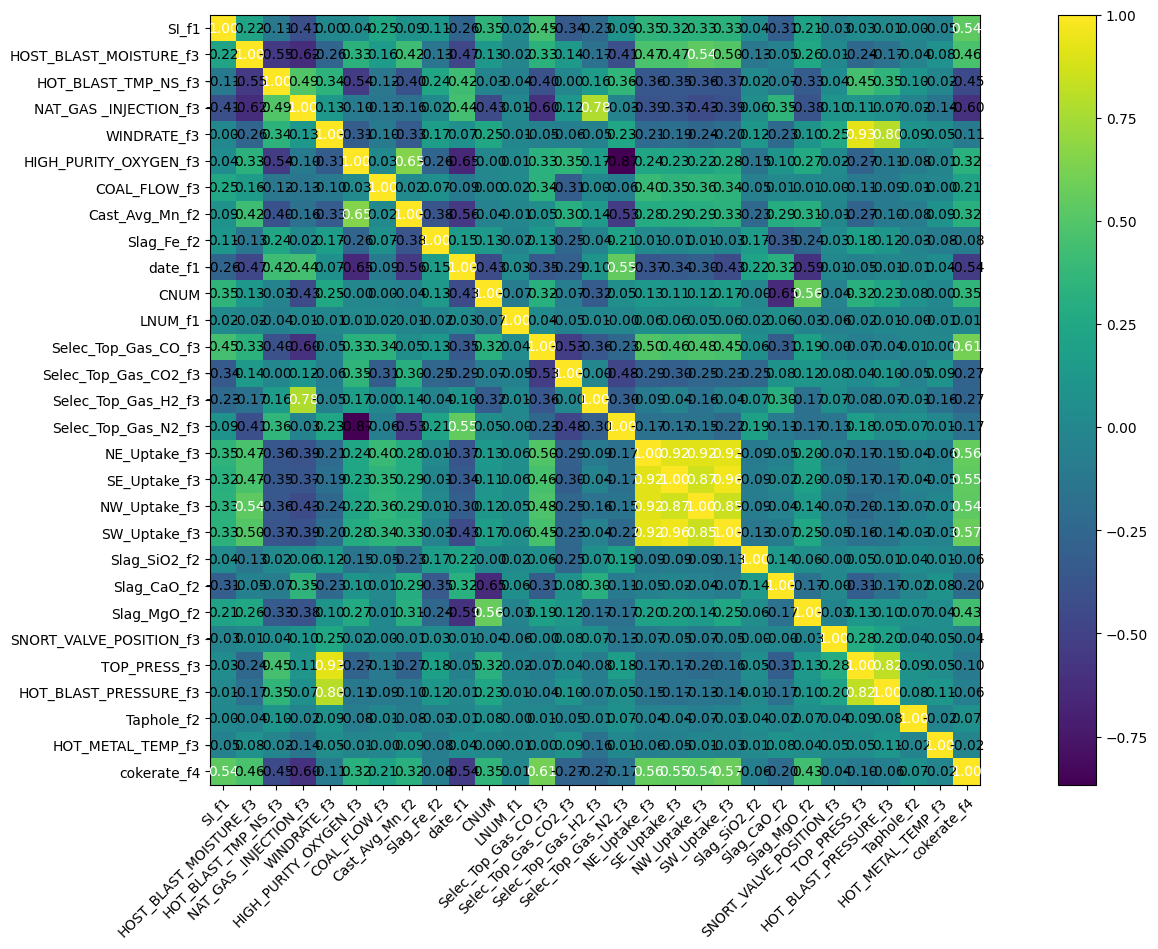

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## UCI data


In [15]:

tsDataWrangling_obj.read_UCI_data()


In [16]:

tsDataWrangling_obj.UCI_Energy_data_df 


date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4       RH_4  \
0      19.200000  44.790000  19.790000  44.730000  19.000000  45.566667   
1      19.200000  44.722500  19.790000  44.790000  19.000000  45.992500   
2      19.200000  44.626667  19.790000  44.933333  18.926667  45.890000   
3      19.200000  44.590000  19.790000  45.000000  18.890000  45.723333   
4      19.200000  44.530000  19.790000  45.000000  18.890000  45.530000   
...          ...        ...        ...        ...        ...        ...   
19730  25.890000  42.025714  27.200000  41.163333  24.700000  45.590000   
19731  25.754000  42.080000  27.133333  41.223333  24.700000  45.590000   
19732  25.628571  42.768571  27.050000  41.690000  24.700000  45.730000   
19733  25.414000  43.036000  26.890000  41.290000  24.700000  45.790000   
19734  25.264286  42.971429  26.823333  41.156667  24.700000  45.963333   

              T5       RH_5         T6       RH_6         T7       RH_7  \
0      17.166667  55.200000   7.026667  84.256667  17.200000  41.626667   
1      17.166667  55.200000   6.833333  84.063333  17.200000  41.560000   
2      17.166667  55.090000   6.560000  83.156667  17.200000  41.433333   
3      17.166667  55.090000   6.433333  83.423333  17.133333  41.290000   
4      17.200000  55.090000   6.366667  84.893333  17.200000  41.230000   
...          ...        ...        ...        ...        ...        ...   
19730  23.200000  52.400000  24.796667   1.000000  24.500000  44.500000   
19731  23.230000  52.326667  24.196667   1.000000  24.557143  44.414286   
19732  23.230000  52.266667  23.626667   1.000000  24.540000  44.400000   
19733  23.200000  52.200000  22.433333   1.000000  24.500000  44.295714   
19734  23.200000  52.200000  21.026667   1.000000  24.500000  44.054000   

            T8       RH_8         T9     RH_9      T_out  Press_mm_hg  \
0      18.2000  48.900000  17.033333  45.5300   6.600000        733.5   
1      18.2000  48.863333  17.066667  45.5600   6.483333        733.6   
2      18.2000  48.730000  17.000000  45.5000   6.366667        733.7   
3      18.1000  48.590000  17.000000  45.4000   6.250000        733.8   
4      18.1000  48.590000  17.000000  45.4000   6.133333        733.9   
...        ...        ...        ...      ...        ...          ...   
19730  24.7000  50.074000  23.200000  46.7900  22.733333        755.2   
19731  24.7000  49.790000  23.200000  46.7900  22.600000        755.2   
19732  24.7000  49.660000  23.200000  46.7900  22.466667        755.2   
19733  24.6625  49.518750  23.200000  46.8175  22.333333        755.2   
19734  24.7360  49.736000  23.200000  46.8450  22.200000        755.2   

          RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0      92.000000   7.000000   63.000000   5.300000  13.275433  13.275433  
1      92.000000   6.666667   59.166667   5.200000  18.606195  18.606195  
2      92.000000   6.333333   55.333333   5.100000  28.642668  28.642668  
3      92.000000   6.000000   51.500000   5.000000  45.410389  45.410389  
4      92.000000   5.666667   47.666667   4.900000  10.084097  10.084097  
...          ...        ... 

In [17]:

tsDataWrangling_obj.format_appliances_data_to_match_CIVS()


In [18]:

tsDataWrangling_obj.UCI_Energy_data_df


lights         T1  Appliances       RH_1         T2       RH_2  \
0          30  19.890000          60  47.596667  19.200000  44.790000   
1          30  19.890000          60  46.693333  19.200000  44.722500   
2          30  19.890000          50  46.300000  19.200000  44.626667   
3          40  19.890000          50  46.066667  19.200000  44.590000   
4          40  19.890000          60  46.333333  19.200000  44.530000   
...       ...        ...         ...        ...        ...        ...   
19730       0  25.566667         100  46.560000  25.890000  42.025714   
19731       0  25.500000          90  46.500000  25.754000  42.080000   
19732      10  25.500000         270  46.596667  25.628571  42.768571   
19733      10  25.500000         420  46.990000  25.414000  43.036000   
19734      10  25.500000         430  46.600000  25.264286  42.971429   

              T3       RH_3         T4       RH_4         T5       RH_5  \
0      19.790000  44.730000  19.000000  45.566667  17.166667  55.200000   
1      19.790000  44.790000  19.000000  45.992500  17.166667  55.200000   
2      19.790000  44.933333  18.926667  45.890000  17.166667  55.090000   
3      19.790000  45.000000  18.890000  45.723333  17.166667  55.090000   
4      19.790000  45.000000  18.890000  45.530000  17.200000  55.090000   
...          ...        ...        ...        ...        ...        ...   
19730  27.200000  41.163333  24.700000  45.590000  23.200000  52.400000   
19731  27.133333  41.223333  24.700000  45.590000  23.230000  52.326667   
19732  27.050000  41.690000  24.700000  45.730000  23.230000  52.266667   
19733  26.890000  41.290000  24.700000  45.790000  23.200000  52.200000   
19734  26.823333  41.156667  24.700000  45.963333  23.200000  52.200000   

              T6       RH_6         T7       RH_7       T8       RH_8  \
0       7.026667  84.256667  17.200000  41.626667  18.2000  48.900000   
1       6.833333  84.063333  17.200000  41.560000  18.2000  48.863333   
2       6.560000  83.156667  17.200000  41.433333  18.2000  48.730000   
3       6.433333  83.423333  17.133333  41.290000  18.1000  48.590000   
4       6.366667  84.893333  17.200000  41.230000  18.1000  48.590000   
...          ...        ...        ...        ...      ...        ...   
19730  24.796667   1.000000  24.500000  44.500000  24.7000  50.074000   
19731  24.196667   1.000000  24.557143  44.414286  24.7000  49.790000   
19732  23.626667   1.000000  24.540000  44.400000  24.7000  49.660000   
19733  22.433333   1.000000  24.500000  44.295714  24.6625  49.518750   
19734  21.026667   1.000000  24.500000  44.054000  24.7360  49.736000   

              T9     RH_9      T_out  Press_mm_hg     RH_out  Windspeed  \
0      17.033333  45.5300   6.600000        733.5  92.000000   7.000000   
1      17.066667  45.5600   6.483333        733.6  92.000000   6.666667   
2      17.000000  45.5000   6.366667        733.7  92.000000   6.333333   
3      17.000000  45.4000   6.250000        733.8  92.000000   6.000000   
4      17.000000  45.4000   6.133333        733.9  92.000000   5.666667   
...          ...      ...        ...          ...        ...        ...   
19730  23.200000  46.7900  22.733333        755.2  55.666667   3.333333   
19731  23.200000  46.7900  22.600000        755.2  56.000000   3.500000   
19732  23.200000  46.7900  22.466667        755.2  56.333333   3.666667   
19733  23.200000  46.8175  22.333333        755.2  56.666667   3.833333   
19734  23.200000  46.8450  22.200000        755.2  57.000000   4.000000   

       Visibility  Tdewpoint        rv1        rv2  
0       63.000000   5.300000  13.275433  13.275433  
1       59.166667   5.200000  18.606195  18.606195  
2       55.333333   5.100000  28.642668  28.642668  
3       51.500000   5.000000  45.410389  45.410389  
4       47.666667   4.900000  10.084097  10.084097  
...           ...        ...        ...        ...  
19730   23.666667  13.333333  43.096812  43.096812  
19731   24.500000  13.30000

In [19]:

print(list(tsDataWrangling_obj.UCI_Energy_data_df.columns))   


['lights', 'T1', 'Appliances', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


In [20]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.UCI_Energy_data_df



## Correlation Matrix


In [21]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['lights', 'T1', 'Appliances', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 
                        'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 
                        'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [22]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   lights       19735 non-null  int64  
 1   T1           19735 non-null  float64
 2   Appliances   19735 non-null  int64  
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

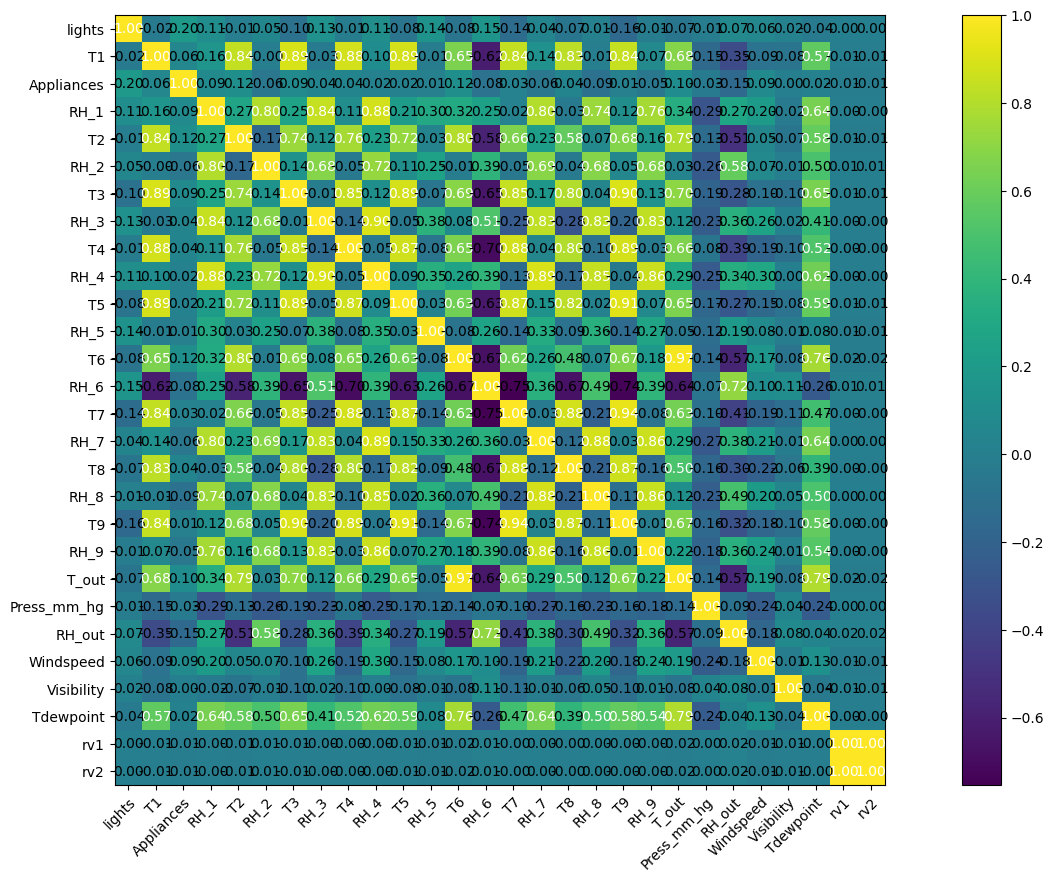

In [23]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [24]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


19735



## Training Functions


In [25]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [26]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [27]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [28]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [29]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        ## loss_SI     = F.mse_loss(    pred_si, y_si   )
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        ## loss_total  = alpha * loss_SI + (1 - alpha) * loss_all 
        
        ## alpha      = 0.9
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        ###################################################################################
        
        main_loss       = criterion(idx_pred[:, :], yb[:, :])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, -1])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 50 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
        
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled





## Train on Train, Test on Test


In [30]:

 inferenceGPT_obj.initialize_preds_lists()



## Run 1


In [31]:

( 
  chunk400to500_train, 
  chunk300to500_train, 
  chunk200to500_train, 
  chunk100to500_train, 
  chunk000to500_train, 
  test_CIVS
) = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.187422
Loss_SI: 1.2700303792953491 Loss_all: 1.1809711456298828
===
[50] Train Loss: 0.192594
Loss_SI: 0.3455830514431 Loss_all: 0.18839366734027863
===


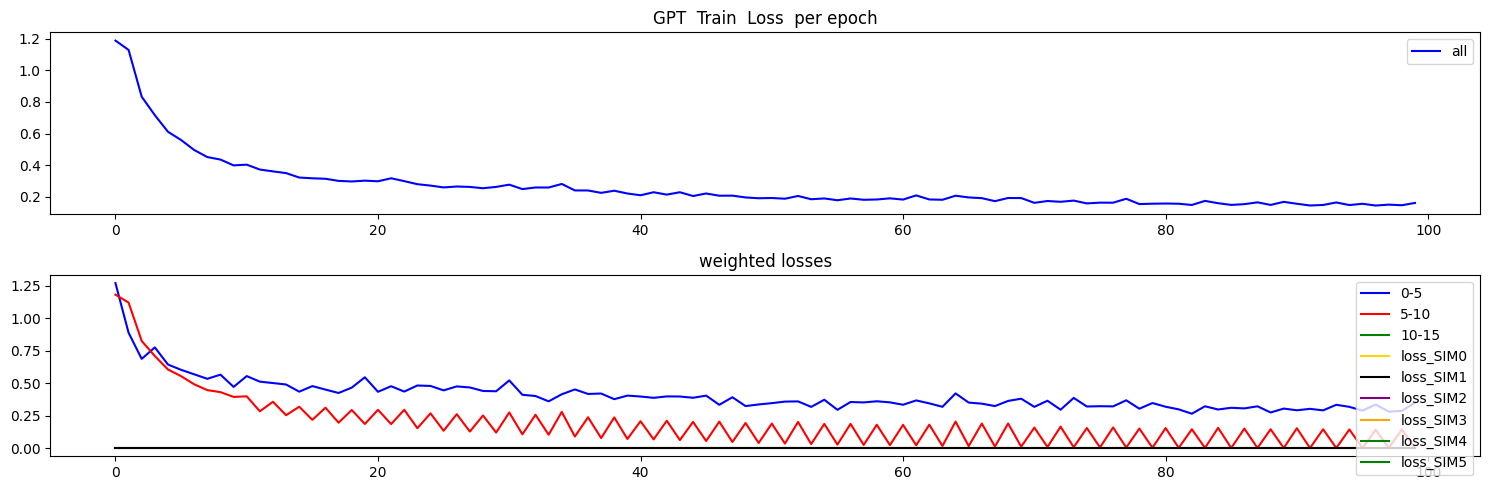

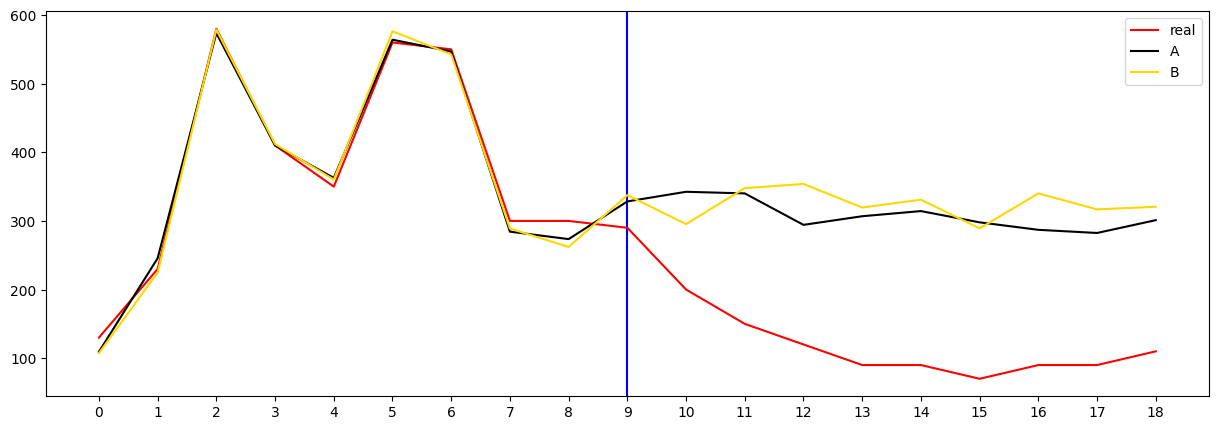

Which prediction is better? (A/B/skip): s


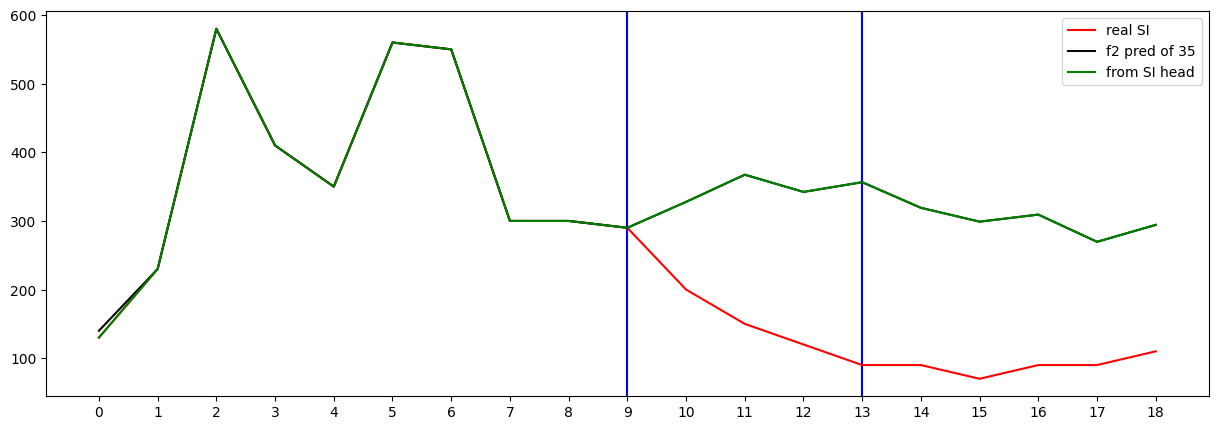

Testing R**2 - (all) - (no inputs):  0.9073459816850349
Testing R**2 - (f2) - SI full (no inputs):  -85.34480359174965
Testing R**2 - SI head only (no inputs):  -85.34480359174965
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -1.6410051819868277
2 ...index R**2 (no inputs):  -85.34480359174965
3 ...index R**2 (no inputs):  -4.525988658531425
4 ...index R**2 (no inputs):  -4.34253175997049
5 ...index R**2 (no inputs):  -3.2133457889520747
6 ...index R**2 (no inputs):  -5.170293532253022
7 ...index R**2 (no inputs):  -3.6627724836176263
8 ...index R**2 (no inputs):  -55.44724127274347
9 ...index R**2 (no inputs):  -125.90356434186002
10 ...index R**2 (no inputs):  -1.519860234214883
11 ...index R**2 (no inputs):  -268.7482284532073
12 ...index R**2 (no inputs):  -0.023430611900113307
13 ...index R**2 (no inputs):  -11.58253574784117
14 ...index R**2 (no inputs):  -1.7237915495262892
15 ...index R**2 (no inputs):  -38.97332368620633
16 ...index R**2 (no inputs):  -18.668

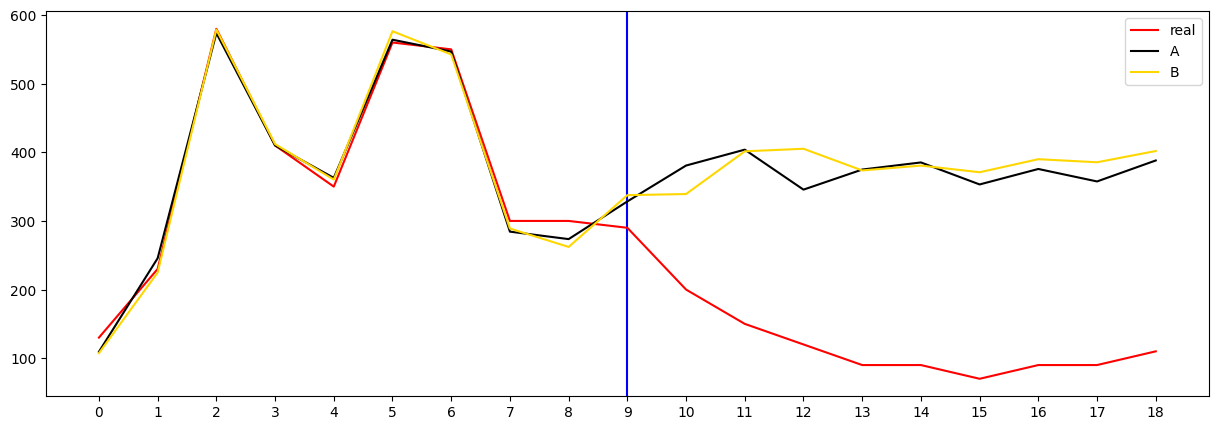

Which prediction is better? (A/B/skip): s


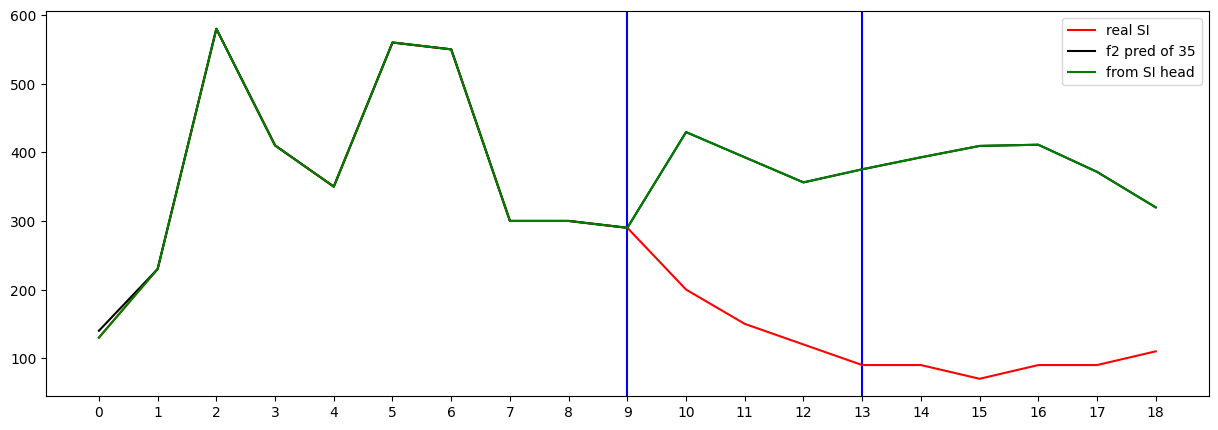

Testing R**2 - (all) - (no inputs):  0.8471961333180107
Testing R**2 - (f2) - SI full (no inputs):  -142.0069444356198
Testing R**2 - SI head only (no inputs):  -142.0069444356198
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -13.310603610891834
2 ...index R**2 (no inputs):  -142.0069444356198
3 ...index R**2 (no inputs):  -1.6484691026418452
4 ...index R**2 (no inputs):  -25.131488819552036
5 ...index R**2 (no inputs):  -2.669755435944321
6 ...index R**2 (no inputs):  -7.623358982973027
7 ...index R**2 (no inputs):  -2.1370373143342727
8 ...index R**2 (no inputs):  -21.233256559239535
9 ...index R**2 (no inputs):  -118.86331316964294
10 ...index R**2 (no inputs):  -4.203920975330917
11 ...index R**2 (no inputs):  -235.7968602902608
12 ...index R**2 (no inputs):  -0.08433126058720153
13 ...index R**2 (no inputs):  -43.96741330576366
14 ...index R**2 (no inputs):  -0.7646873583358775
15 ...index R**2 (no inputs):  -25.85905889254923
16 ...index R**2 (no inputs):  -0.63

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk400to500_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 

res_real, res_pred = inferenceGPT_obj.function_test_rc_42( chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42( chunk400to500_train, test_CIVS, model_DPO , x_means, x_standard_devs,  9  )



[0] Train Loss: 1.239811
Loss_SI: 0.7672139406204224 Loss_all: 1.2332894802093506
===
[50] Train Loss: 0.215760
Loss_SI: 0.3575902581214905 Loss_all: 0.21292485296726227
===


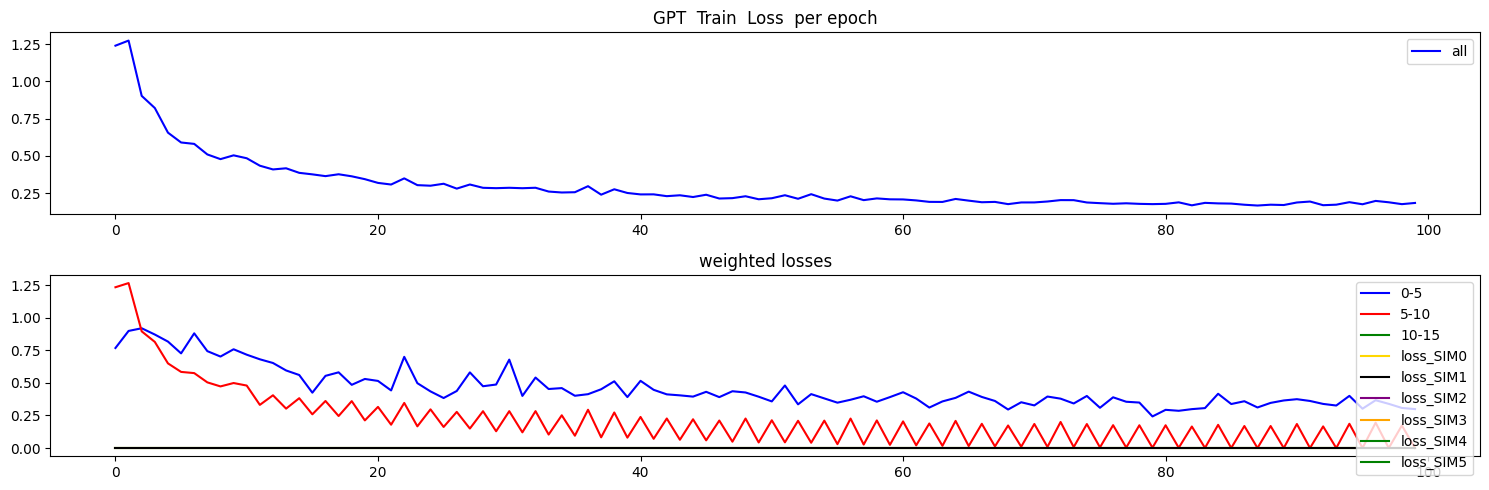

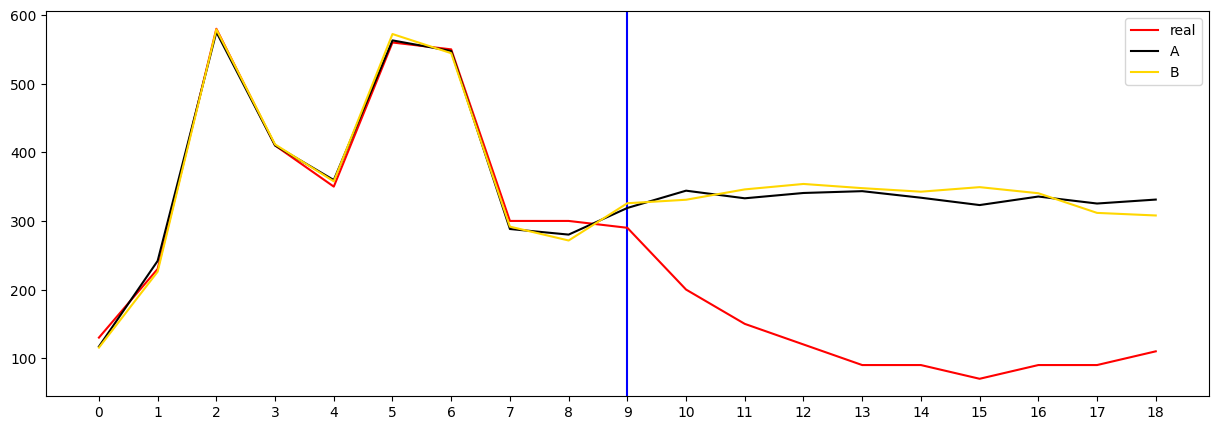

Which prediction is better? (A/B/skip): s


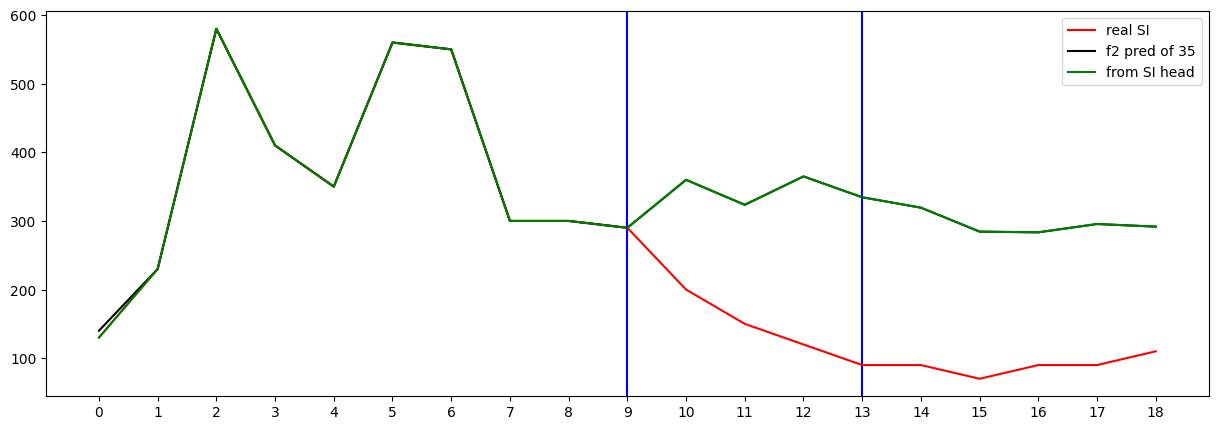

Testing R**2 - (all) - (no inputs):  0.9104704547865093
Testing R**2 - (f2) - SI full (no inputs):  -82.37362564835999
Testing R**2 - SI head only (no inputs):  -82.37362564835999
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -7.1662896081876575
2 ...index R**2 (no inputs):  -82.37362564835999
3 ...index R**2 (no inputs):  -2.4949415296104016
4 ...index R**2 (no inputs):  -1.6128294457639796
5 ...index R**2 (no inputs):  -1.2050893818095503
6 ...index R**2 (no inputs):  -10.486228902792258
7 ...index R**2 (no inputs):  -1.0087542853135005
8 ...index R**2 (no inputs):  -0.9613895075643544
9 ...index R**2 (no inputs):  -136.9637381886371
10 ...index R**2 (no inputs):  -27.803103535270797
11 ...index R**2 (no inputs):  -1930.8160738280792
12 ...index R**2 (no inputs):  0.36990303112286926
13 ...index R**2 (no inputs):  -72.12939080495133
14 ...index R**2 (no inputs):  -1.148050667189156
15 ...index R**2 (no inputs):  -39.444514706013855
16 ...index R**2 (no inputs):  -2.

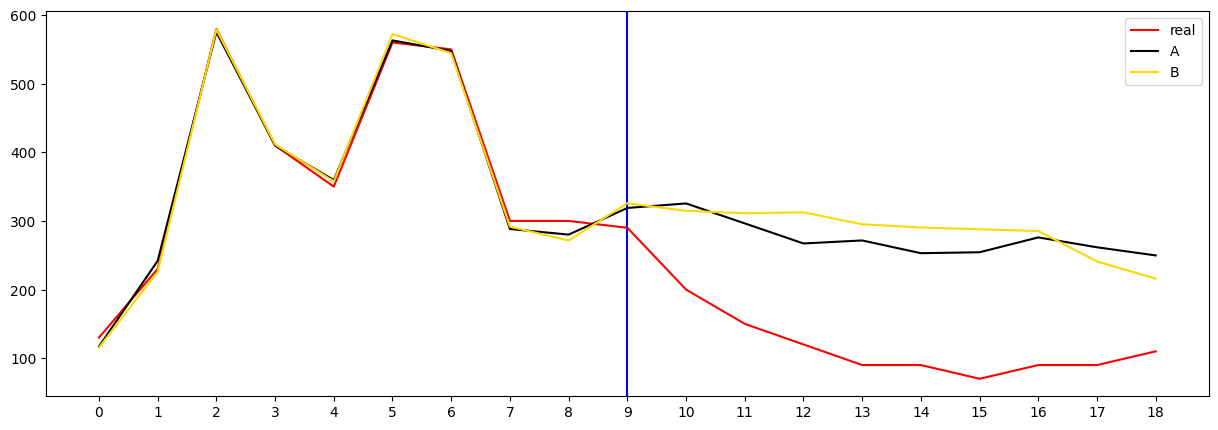

Which prediction is better? (A/B/skip): a
Saved preference.


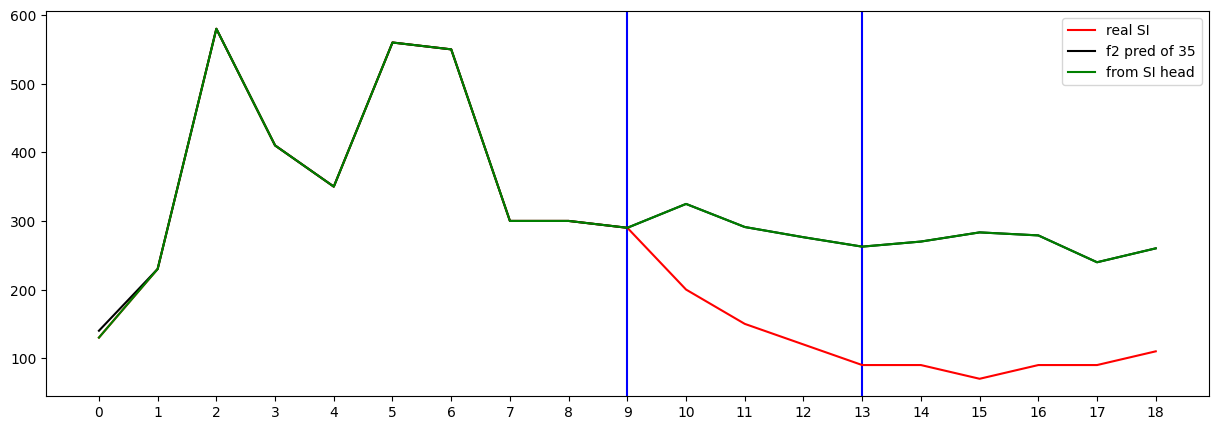

Testing R**2 - (all) - (no inputs):  0.9410316365000813
Testing R**2 - (f2) - SI full (no inputs):  -52.980443505135
Testing R**2 - SI head only (no inputs):  -52.980443505135
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -7.936316294519388
2 ...index R**2 (no inputs):  -52.980443505135
3 ...index R**2 (no inputs):  -9.357290682008005
4 ...index R**2 (no inputs):  -1.6521222034111154
5 ...index R**2 (no inputs):  -10.461774388045763
6 ...index R**2 (no inputs):  -10.36550964999301
7 ...index R**2 (no inputs):  -1.433802984850518
8 ...index R**2 (no inputs):  -1.0294171083506036
9 ...index R**2 (no inputs):  -187.35888101444854
10 ...index R**2 (no inputs):  -5.916874661423835
11 ...index R**2 (no inputs):  -1356.1856077358427
12 ...index R**2 (no inputs):  0.0012984129680783107
13 ...index R**2 (no inputs):  -229.18174296347058
14 ...index R**2 (no inputs):  0.41725350633637615
15 ...index R**2 (no inputs):  -98.04423327480502
16 ...index R**2 (no inputs):  -13.342144

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to500_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )




[0] Train Loss: 1.341795
Loss_SI: 1.153499960899353 Loss_all: 1.3351587057113647
===
[50] Train Loss: 0.238952
Loss_SI: 0.4404318034648895 Loss_all: 0.23596487939357758
===


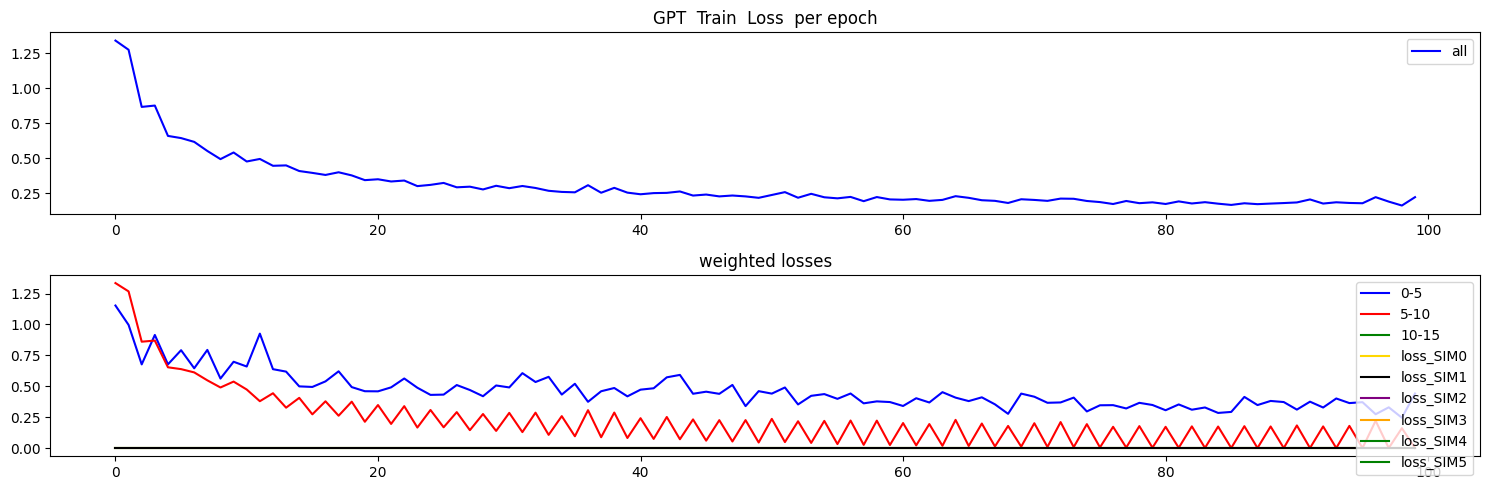

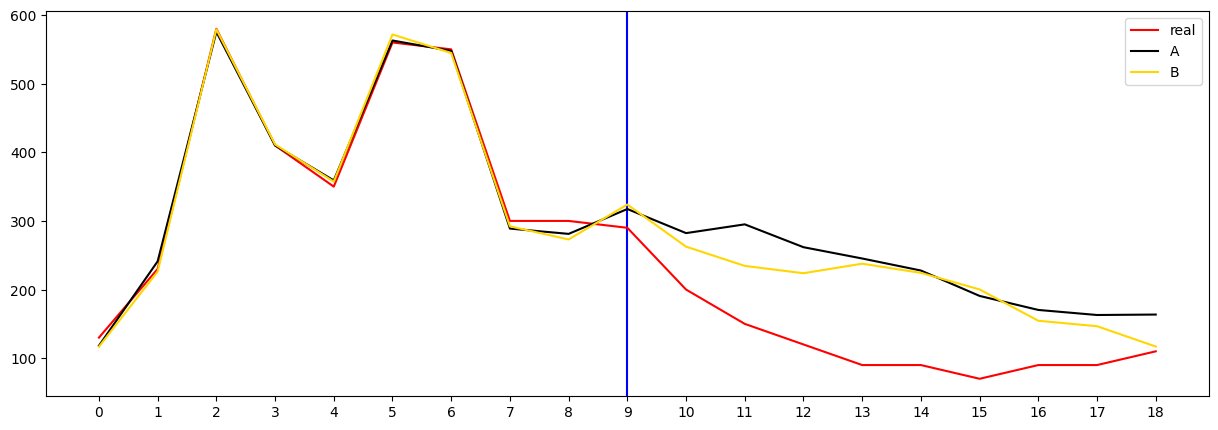

Which prediction is better? (A/B/skip): b
Saved preference.


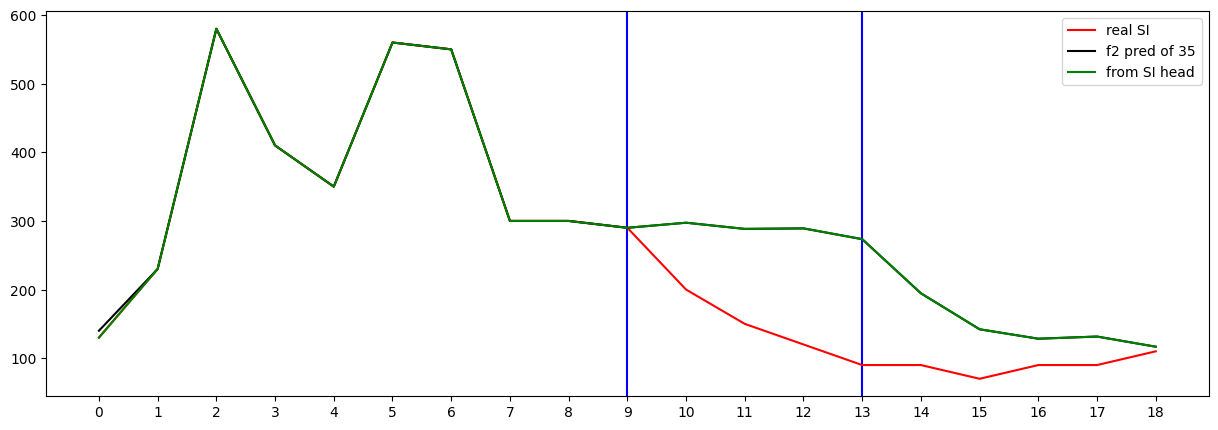

Testing R**2 - (all) - (no inputs):  0.9664205604837643
Testing R**2 - (f2) - SI full (no inputs):  -27.62034712629625
Testing R**2 - SI head only (no inputs):  -27.62034712629625
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -127.8305152074264
2 ...index R**2 (no inputs):  -27.62034712629625
3 ...index R**2 (no inputs):  -28.32414353201389
4 ...index R**2 (no inputs):  -1.876214518923462
5 ...index R**2 (no inputs):  -59.02107248154002
6 ...index R**2 (no inputs):  -15.900136115210167
7 ...index R**2 (no inputs):  0.1462023453143818
8 ...index R**2 (no inputs):  -6.515942537552227
9 ...index R**2 (no inputs):  -75.99972988115748
10 ...index R**2 (no inputs):  -11.004662920776655
11 ...index R**2 (no inputs):  -1162.1246998044169
12 ...index R**2 (no inputs):  -2.6060605458102972
13 ...index R**2 (no inputs):  -571.5820656062115
14 ...index R**2 (no inputs):  -7.138962394771902
15 ...index R**2 (no inputs):  -148.8937075904352
16 ...index R**2 (no inputs):  -21.373391

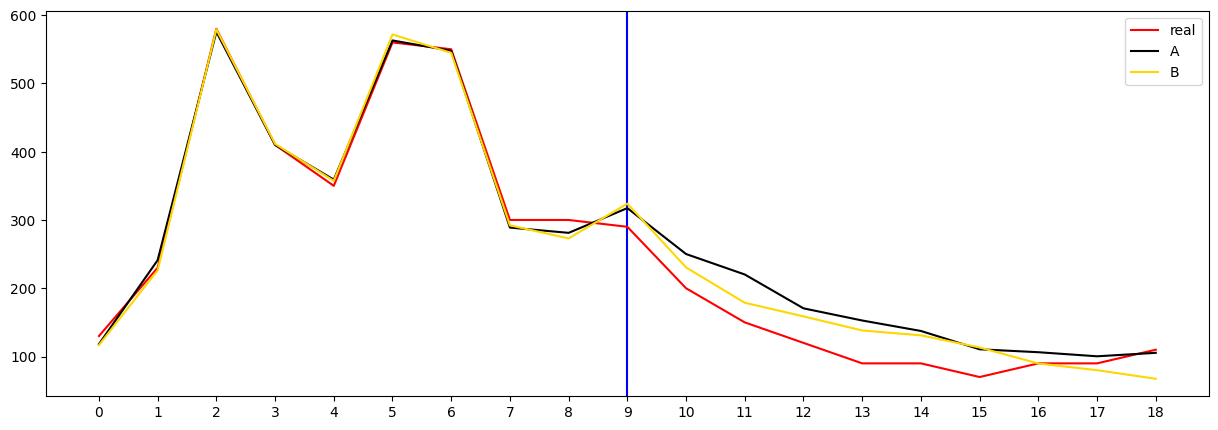

Which prediction is better? (A/B/skip): b
Saved preference.


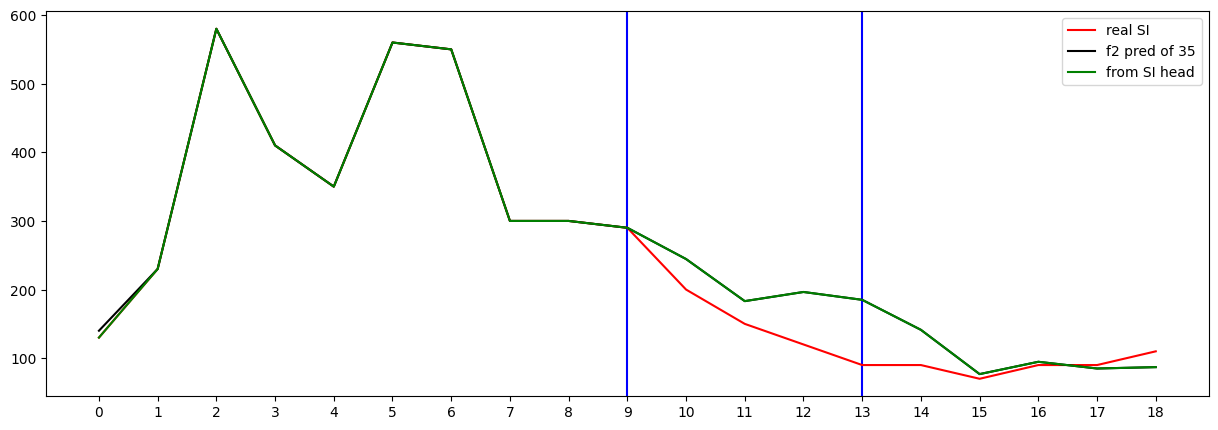

Testing R**2 - (all) - (no inputs):  0.9866237603071917
Testing R**2 - (f2) - SI full (no inputs):  -7.172258231136942
Testing R**2 - SI head only (no inputs):  -7.172258231136942
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -61.47313712912576
2 ...index R**2 (no inputs):  -7.172258231136942
3 ...index R**2 (no inputs):  -118.93328567308765
4 ...index R**2 (no inputs):  -2.338169999792676
5 ...index R**2 (no inputs):  -207.0941467682104
6 ...index R**2 (no inputs):  -17.189141056060176
7 ...index R**2 (no inputs):  0.039577109002326916
8 ...index R**2 (no inputs):  -17.70961847186111
9 ...index R**2 (no inputs):  -132.2882486838732
10 ...index R**2 (no inputs):  -0.7520652511952406
11 ...index R**2 (no inputs):  -1204.6941728669017
12 ...index R**2 (no inputs):  -5.724243249991098
13 ...index R**2 (no inputs):  -1026.4668536876977
14 ...index R**2 (no inputs):  -8.118452882961178
15 ...index R**2 (no inputs):  -280.81562056569607
16 ...index R**2 (no inputs):  -21.00

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )



[0] Train Loss: 1.274874
Loss_SI: 1.0795626640319824 Loss_all: 1.2682539224624634
===
[50] Train Loss: 0.238634
Loss_SI: 0.576533317565918 Loss_all: 0.23590344190597534
===


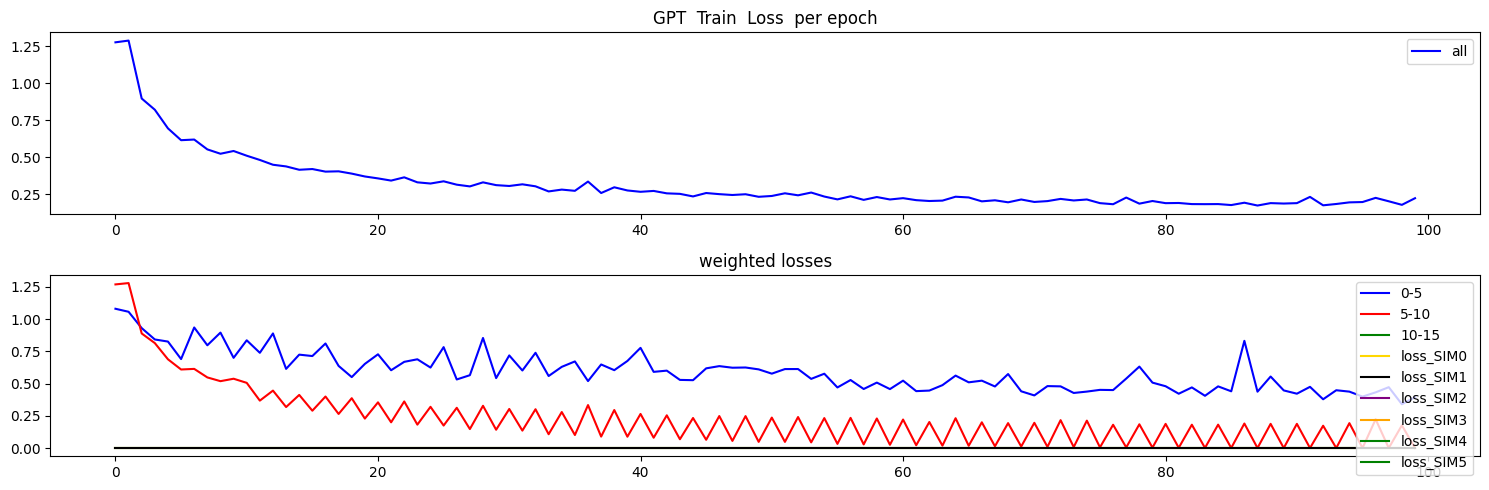

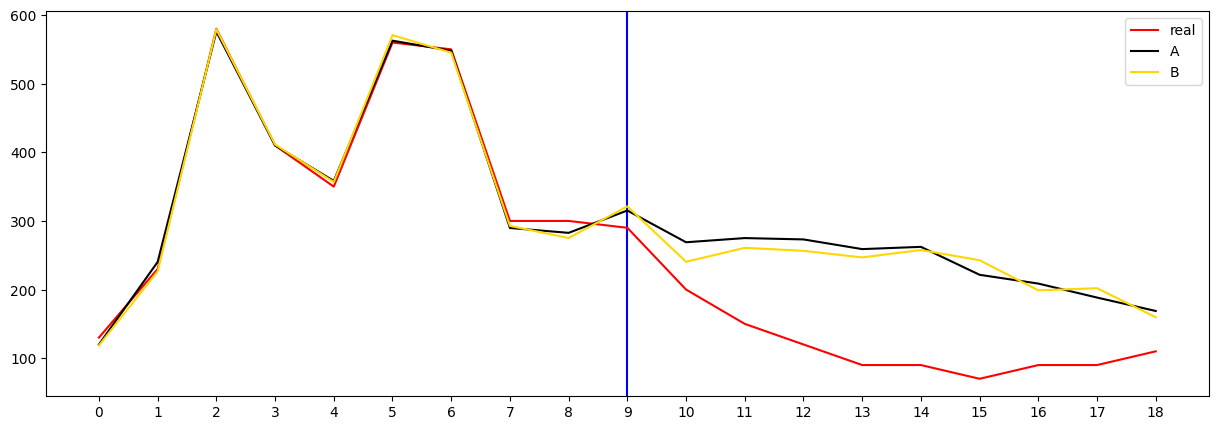

Which prediction is better? (A/B/skip): b
Saved preference.


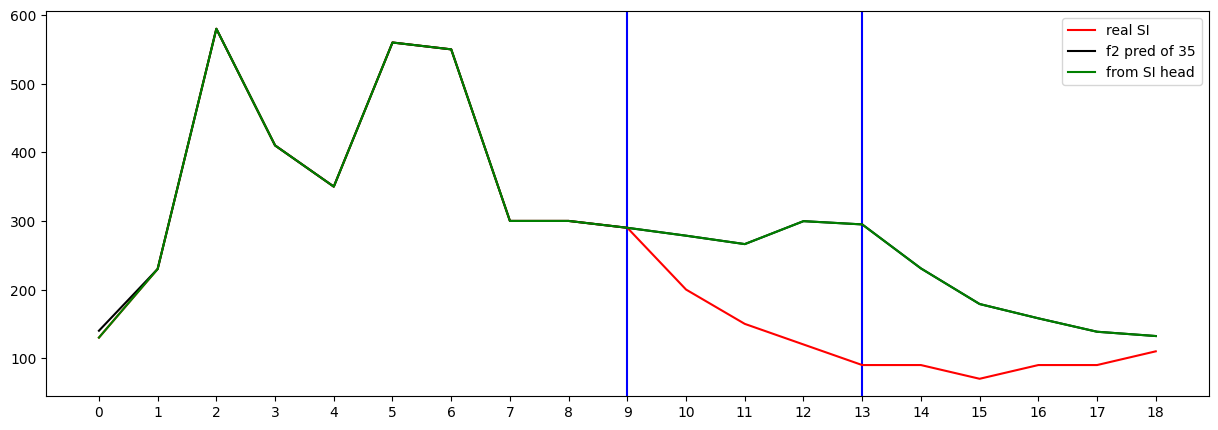

Testing R**2 - (all) - (no inputs):  0.9628938654999065
Testing R**2 - (f2) - SI full (no inputs):  -31.473505671831987
Testing R**2 - SI head only (no inputs):  -31.473505671831987
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -82.16024858090057
2 ...index R**2 (no inputs):  -31.473505671831987
3 ...index R**2 (no inputs):  -27.932630131693703
4 ...index R**2 (no inputs):  -10.12873323574263
5 ...index R**2 (no inputs):  -60.87889898153179
6 ...index R**2 (no inputs):  -18.73901720090576
7 ...index R**2 (no inputs):  0.26702081808153555
8 ...index R**2 (no inputs):  -36.451732192894106
9 ...index R**2 (no inputs):  -62.51454613978456
10 ...index R**2 (no inputs):  -2.902657797903309
11 ...index R**2 (no inputs):  -826.7665294886796
12 ...index R**2 (no inputs):  -0.939083644851588
13 ...index R**2 (no inputs):  -422.3498320529186
14 ...index R**2 (no inputs):  -7.90722567657043
15 ...index R**2 (no inputs):  -160.5368541309398
16 ...index R**2 (no inputs):  -8.656428

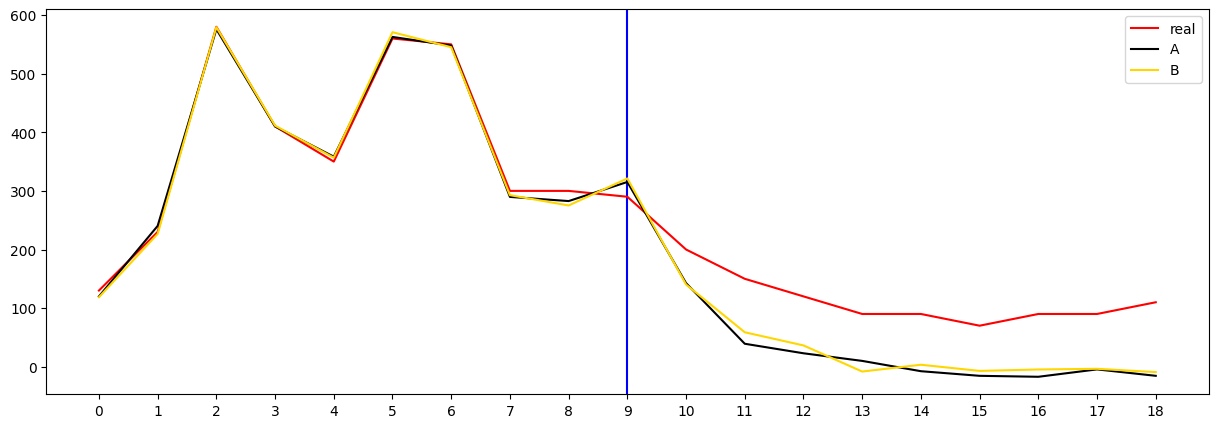

Which prediction is better? (A/B/skip): b
Saved preference.


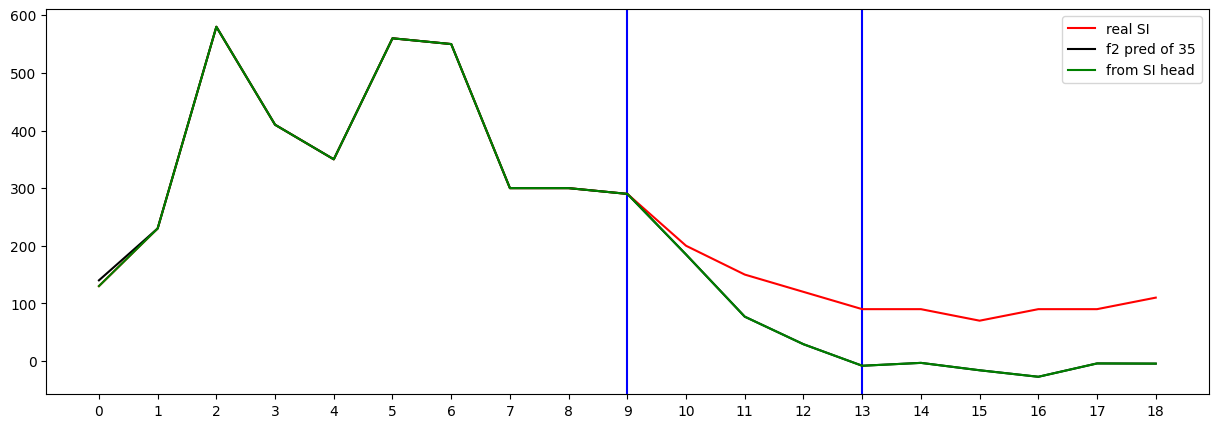

Testing R**2 - (all) - (no inputs):  0.9735986362627409
Testing R**2 - (f2) - SI full (no inputs):  -14.514281470300007
Testing R**2 - SI head only (no inputs):  -14.514281470300007
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -160.79904042845283
2 ...index R**2 (no inputs):  -14.514281470300007
3 ...index R**2 (no inputs):  -52.49568351299733
4 ...index R**2 (no inputs):  -22.38787968042962
5 ...index R**2 (no inputs):  -260.71713264119796
6 ...index R**2 (no inputs):  -24.404929621716423
7 ...index R**2 (no inputs):  0.3113229907532321
8 ...index R**2 (no inputs):  -18.2550019479627
9 ...index R**2 (no inputs):  -633.6144621112103
10 ...index R**2 (no inputs):  -1.8738130990041615
11 ...index R**2 (no inputs):  -3425.5574023100253
12 ...index R**2 (no inputs):  -12.629856137505975
13 ...index R**2 (no inputs):  -1866.727806112977
14 ...index R**2 (no inputs):  -7.331711145154239
15 ...index R**2 (no inputs):  -612.0980742240079
16 ...index R**2 (no inputs):  -48.09

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to500_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 1.335139
Loss_SI: 1.2062805891036987 Loss_all: 1.3285562992095947
===
[50] Train Loss: 0.252754
Loss_SI: 0.7342116236686707 Loss_all: 0.250348836183548
===


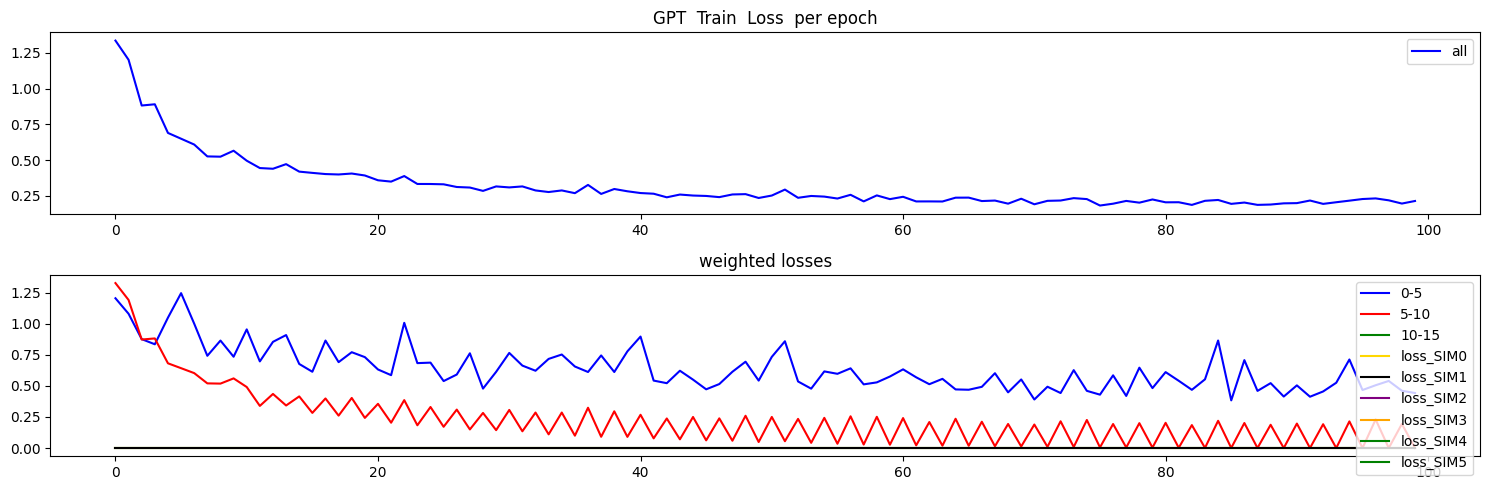

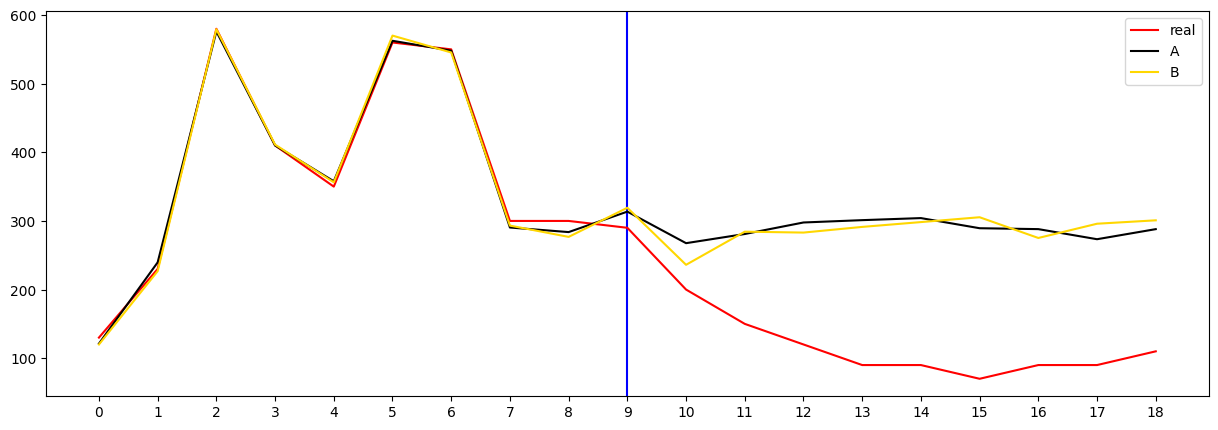

Which prediction is better? (A/B/skip): b
Saved preference.


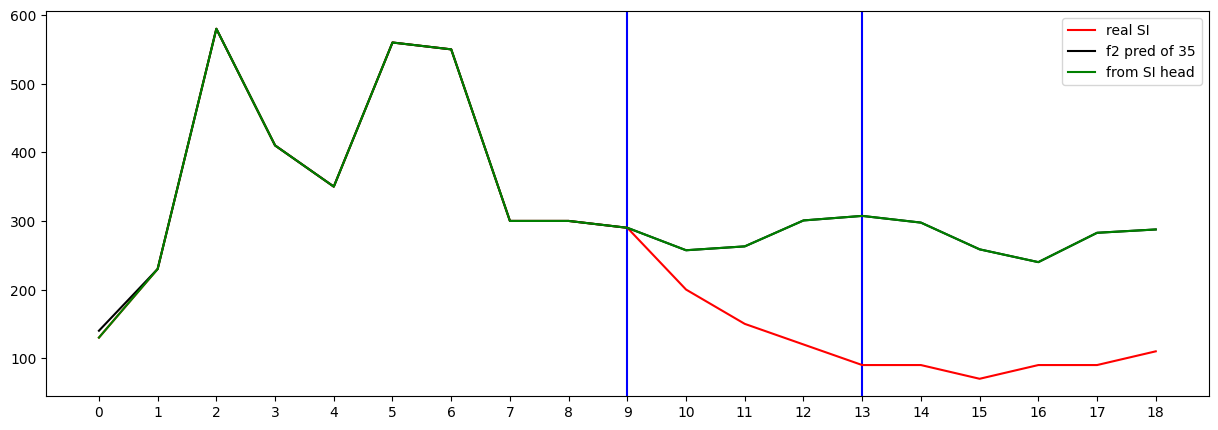

Testing R**2 - (all) - (no inputs):  0.9396185858869716
Testing R**2 - (f2) - SI full (no inputs):  -54.93915101295255
Testing R**2 - SI head only (no inputs):  -54.93915101295255
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -154.72918106414073
2 ...index R**2 (no inputs):  -54.93915101295255
3 ...index R**2 (no inputs):  -25.3035418707294
4 ...index R**2 (no inputs):  -5.64038682148623
5 ...index R**2 (no inputs):  -24.937744958963357
6 ...index R**2 (no inputs):  -23.676627807057535
7 ...index R**2 (no inputs):  0.10408451483550951
8 ...index R**2 (no inputs):  -33.91370024387079
9 ...index R**2 (no inputs):  -5.523084396684263
10 ...index R**2 (no inputs):  -1.107056520354019
11 ...index R**2 (no inputs):  -417.0368612651709
12 ...index R**2 (no inputs):  0.5255339955660938
13 ...index R**2 (no inputs):  -46.83406552497113
14 ...index R**2 (no inputs):  -15.32310179572617
15 ...index R**2 (no inputs):  -48.0517556337446
16 ...index R**2 (no inputs):  -4.5024814547

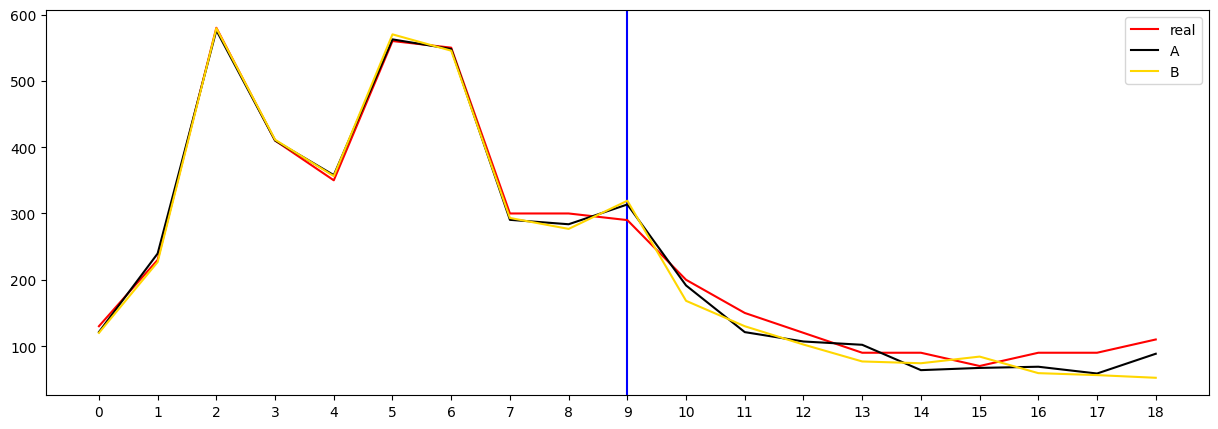

Which prediction is better? (A/B/skip): s


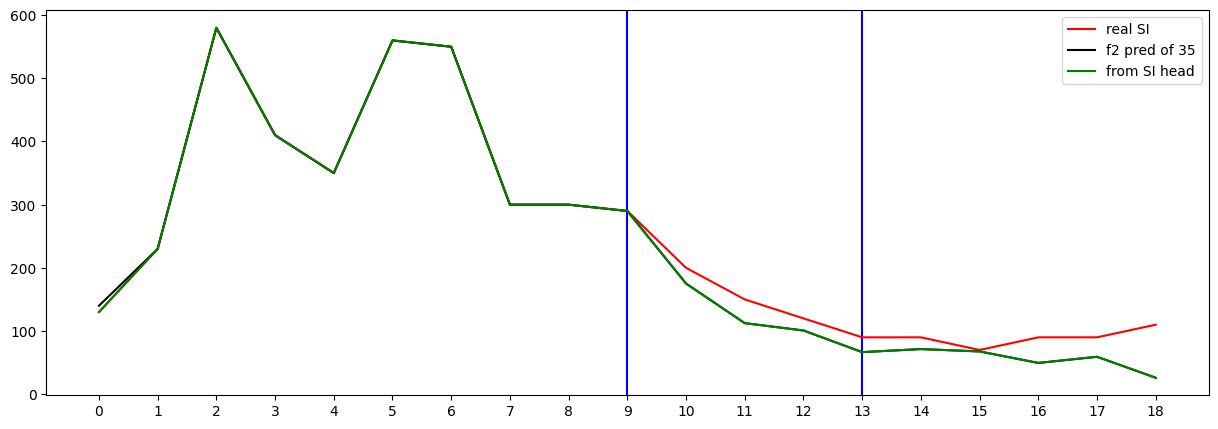

Testing R**2 - (all) - (no inputs):  0.9894026036668714
Testing R**2 - (f2) - SI full (no inputs):  -2.3630947358891867
Testing R**2 - SI head only (no inputs):  -2.3630947358891867
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -996.0038625808087
2 ...index R**2 (no inputs):  -2.3630947358891867
3 ...index R**2 (no inputs):  -210.00955733603166
4 ...index R**2 (no inputs):  -10.169302254069295
5 ...index R**2 (no inputs):  -219.85860600896584
6 ...index R**2 (no inputs):  -21.214438026184972
7 ...index R**2 (no inputs):  0.2800885752268891
8 ...index R**2 (no inputs):  -23.431377493703895
9 ...index R**2 (no inputs):  -620.8783176436915
10 ...index R**2 (no inputs):  -180.48308743386107
11 ...index R**2 (no inputs):  -6376.630959445861
12 ...index R**2 (no inputs):  -2.6094762593122747
13 ...index R**2 (no inputs):  -1058.4862419624012
14 ...index R**2 (no inputs):  -80.09631949228958
15 ...index R**2 (no inputs):  -441.0043768617809
16 ...index R**2 (no inputs):  -23

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )




## Run 2


In [37]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.345704
Loss_SI: 1.3647315502166748 Loss_all: 1.3390886783599854
===
[50] Train Loss: 0.228999
Loss_SI: 0.7780103087425232 Loss_all: 0.22548039257526398
===


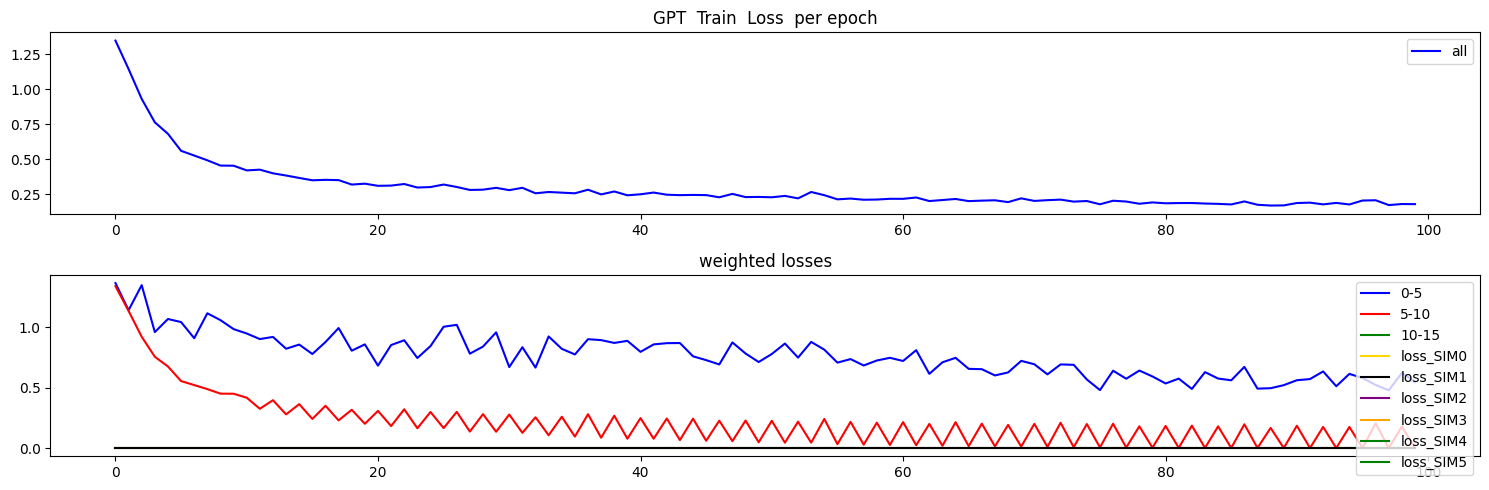

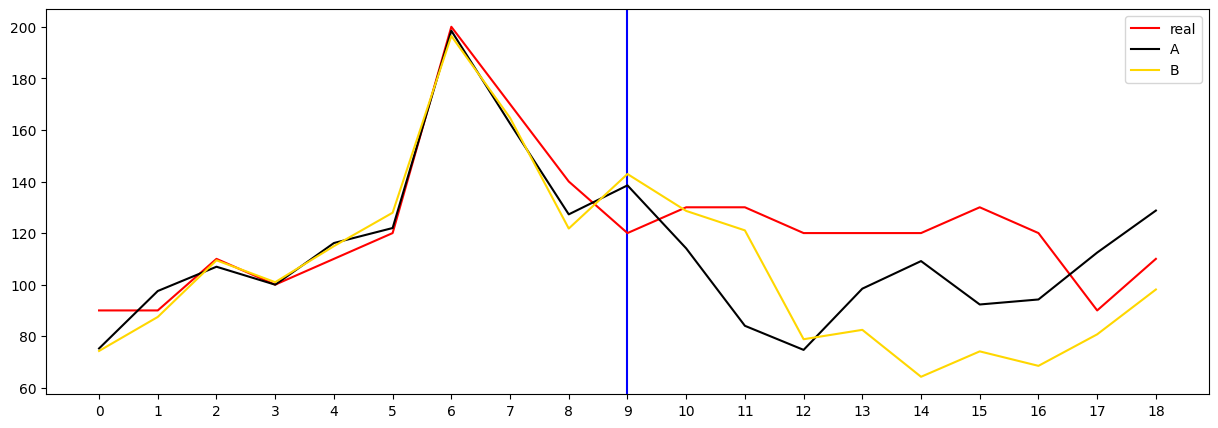

Which prediction is better? (A/B/skip): b
Saved preference.


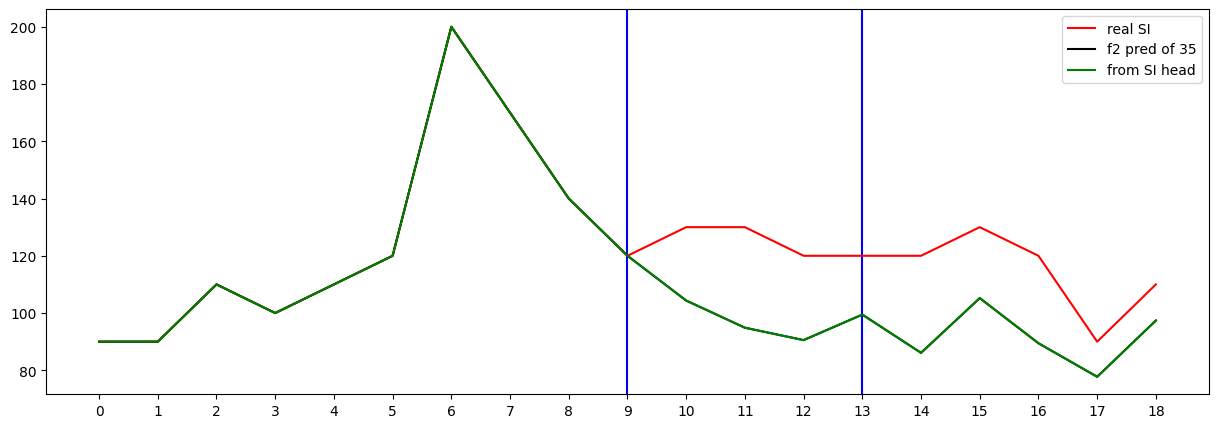

Testing R**2 - (all) - (no inputs):  0.9971016603156929
Testing R**2 - (f2) - SI full (no inputs):  -2.1945116807153346
Testing R**2 - SI head only (no inputs):  -2.1945116807153346
0 ...index R**2 (no inputs):  -0.1495411683737835
1 ...index R**2 (no inputs):  -3.8580346750393915
2 ...index R**2 (no inputs):  -2.1945116807153346
3 ...index R**2 (no inputs):  -74.95154896264673
4 ...index R**2 (no inputs):  -4.9343334650848485
5 ...index R**2 (no inputs):  -10.670892582997828
6 ...index R**2 (no inputs):  -0.8075784393604986
7 ...index R**2 (no inputs):  -167.24445157594278
8 ...index R**2 (no inputs):  -3.9921969785223146
9 ...index R**2 (no inputs):  -54.76485888694924
10 ...index R**2 (no inputs):  -2.9007796419869103
11 ...index R**2 (no inputs):  -1.0770726599395353
12 ...index R**2 (no inputs):  -4.924875883450642
13 ...index R**2 (no inputs):  -2.8647569829982387
14 ...index R**2 (no inputs):  -13.286643499457941
15 ...index R**2 (no inputs):  -17.966145564398534
16 ...index R**

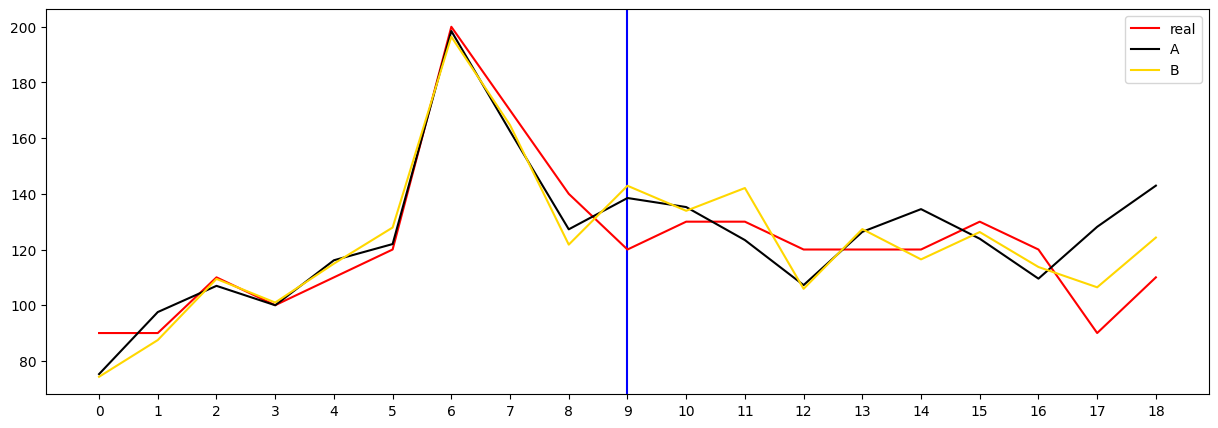

Which prediction is better? (A/B/skip): s


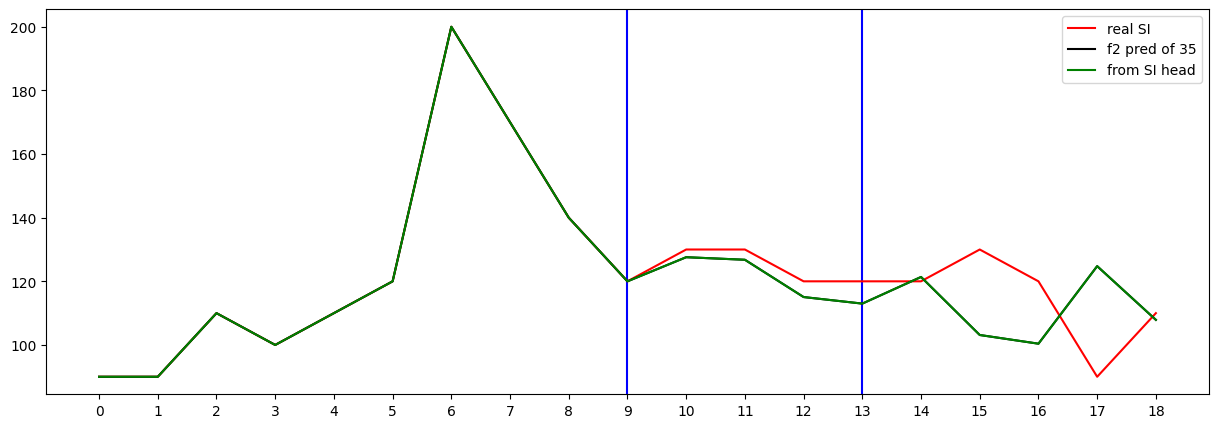

Testing R**2 - (all) - (no inputs):  0.998373567410329
Testing R**2 - (f2) - SI full (no inputs):  0.37969875930208163
Testing R**2 - SI head only (no inputs):  0.37969875930208163
0 ...index R**2 (no inputs):  -0.18441721928322452
1 ...index R**2 (no inputs):  -56.12293287435452
2 ...index R**2 (no inputs):  0.37969875930208163
3 ...index R**2 (no inputs):  -102.68749373771338
4 ...index R**2 (no inputs):  -3.745749372723555
5 ...index R**2 (no inputs):  -53.39817999735978
6 ...index R**2 (no inputs):  -30.0267683685221
7 ...index R**2 (no inputs):  -245.1530512880894
8 ...index R**2 (no inputs):  -0.732503892969179
9 ...index R**2 (no inputs):  -124.73820013150176
10 ...index R**2 (no inputs):  -17.066774385715522
11 ...index R**2 (no inputs):  -0.05876319465989366
12 ...index R**2 (no inputs):  -31.48392575358448
13 ...index R**2 (no inputs):  -3.2709147704784476
14 ...index R**2 (no inputs):  -78.33171704103752
15 ...index R**2 (no inputs):  -22.83141193090071
16 ...index R**2 (no 

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk400to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.333965
Loss_SI: 1.3307936191558838 Loss_all: 1.3274813890457153
===
[50] Train Loss: 0.220870
Loss_SI: 0.538199245929718 Loss_all: 0.21840962767601013
===


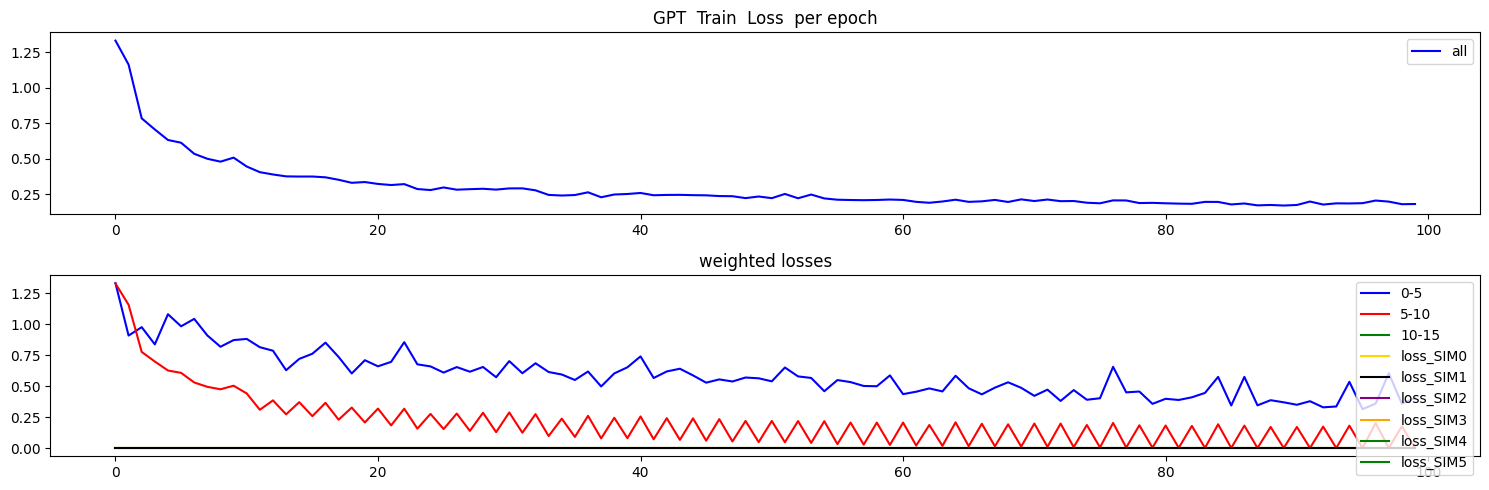

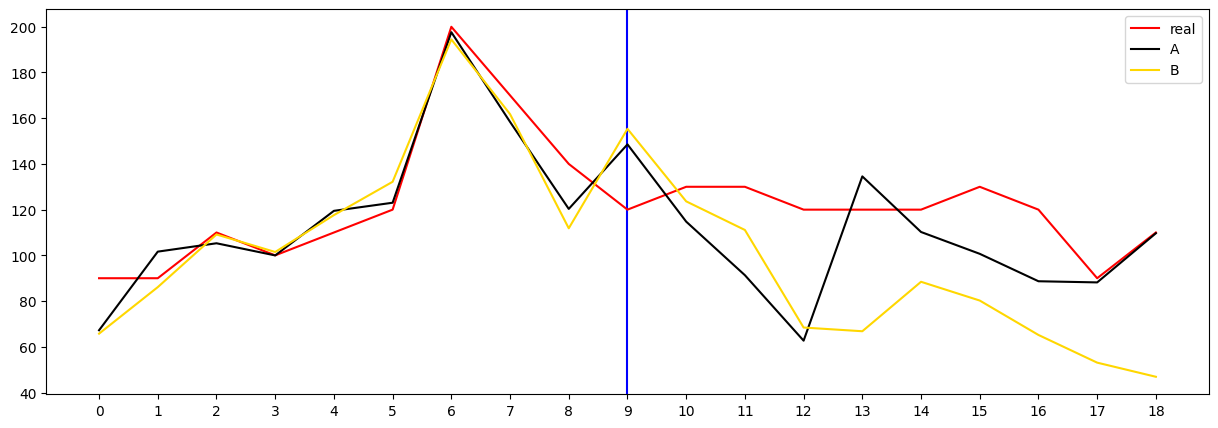

Which prediction is better? (A/B/skip): s


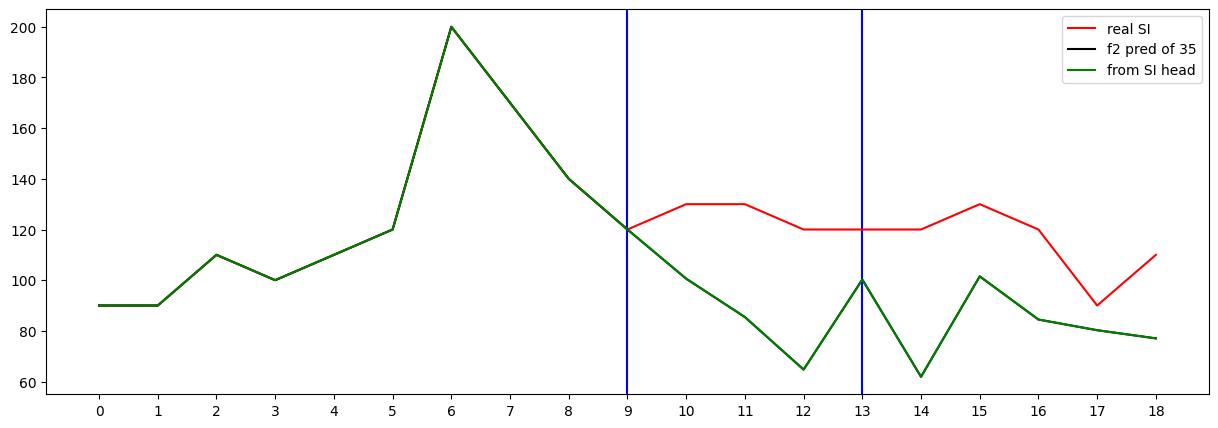

Testing R**2 - (all) - (no inputs):  0.9962721924691391
Testing R**2 - (f2) - SI full (no inputs):  -5.349843227835712
Testing R**2 - SI head only (no inputs):  -5.349843227835712
0 ...index R**2 (no inputs):  -0.20269034404380082
1 ...index R**2 (no inputs):  -3.1585266062484187
2 ...index R**2 (no inputs):  -5.349843227835712
3 ...index R**2 (no inputs):  -76.52540517298016
4 ...index R**2 (no inputs):  -13.84010985312687
5 ...index R**2 (no inputs):  -6.752692704976871
6 ...index R**2 (no inputs):  -8.831491094569328
7 ...index R**2 (no inputs):  -258.5248242955455
8 ...index R**2 (no inputs):  -2.4000801336305133
9 ...index R**2 (no inputs):  -29.727750262652645
10 ...index R**2 (no inputs):  -0.3476893689377598
11 ...index R**2 (no inputs):  -0.8327271859708736
12 ...index R**2 (no inputs):  -9.439967556249547
13 ...index R**2 (no inputs):  -2.606271562678088
14 ...index R**2 (no inputs):  -9.439619450247088
15 ...index R**2 (no inputs):  -19.299116970850058
16 ...index R**2 (no i

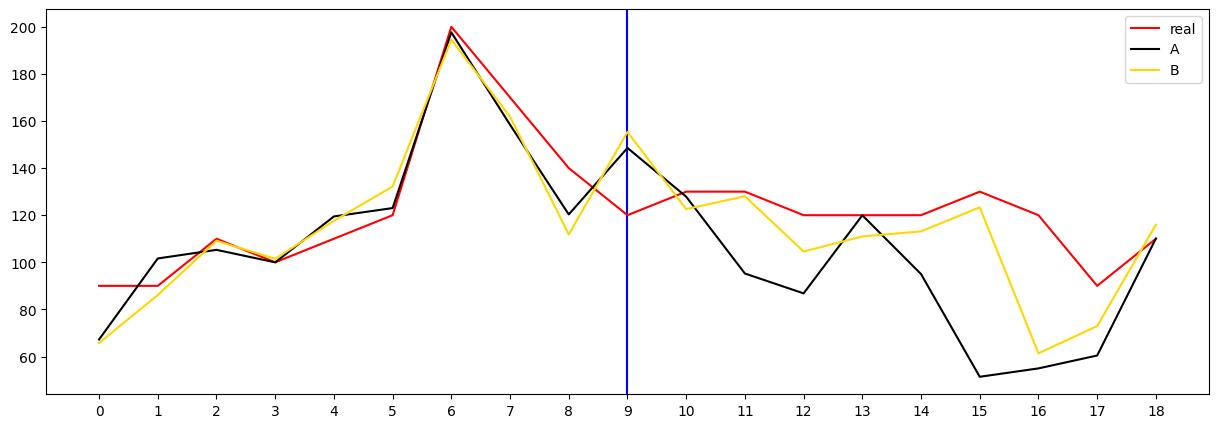

Which prediction is better? (A/B/skip): b
Saved preference.


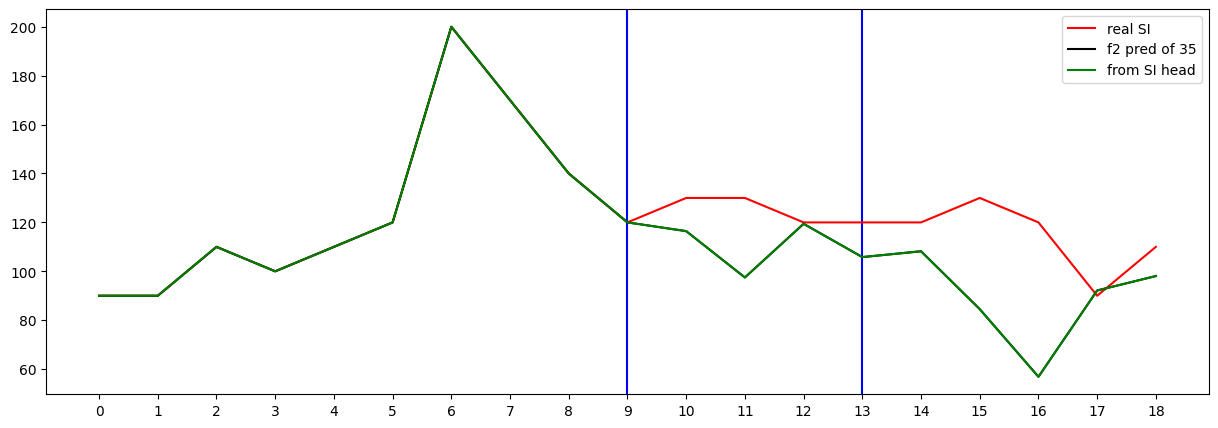

Testing R**2 - (all) - (no inputs):  0.9976662330225073
Testing R**2 - (f2) - SI full (no inputs):  -1.2535690911084494
Testing R**2 - SI head only (no inputs):  -1.2535690911084494
0 ...index R**2 (no inputs):  -1.1054005170079075
1 ...index R**2 (no inputs):  -38.35368992623171
2 ...index R**2 (no inputs):  -1.2535690911084494
3 ...index R**2 (no inputs):  -265.2811440222018
4 ...index R**2 (no inputs):  -4.625827709093311
5 ...index R**2 (no inputs):  -3.6753847469725995
6 ...index R**2 (no inputs):  -71.12064377840987
7 ...index R**2 (no inputs):  -111.43841814128815
8 ...index R**2 (no inputs):  -47.31602723794759
9 ...index R**2 (no inputs):  -340.03968973812994
10 ...index R**2 (no inputs):  -2.3039953921783667
11 ...index R**2 (no inputs):  -0.007898019019885849
12 ...index R**2 (no inputs):  -6.7601323871879355
13 ...index R**2 (no inputs):  -2.181970389155077
14 ...index R**2 (no inputs):  -0.6935838443904692
15 ...index R**2 (no inputs):  -26.975084778121673
16 ...index R**2

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.324618
Loss_SI: 0.9076812863349915 Loss_all: 1.3180396556854248
===
[50] Train Loss: 0.234988
Loss_SI: 0.5599860548973083 Loss_all: 0.23278535902500153
===


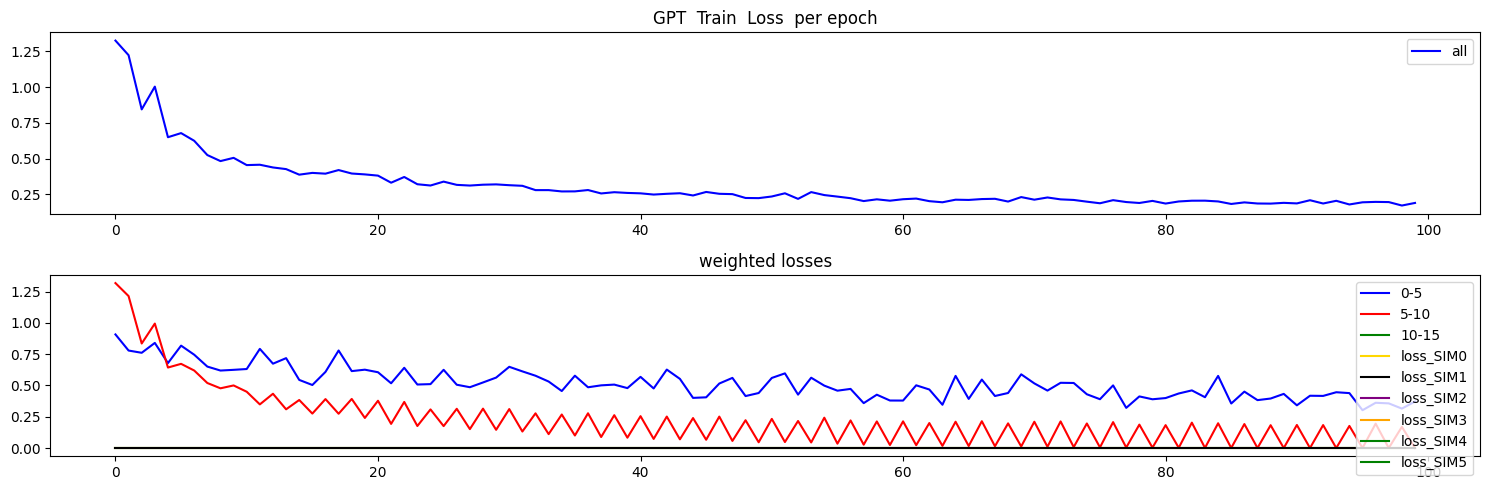

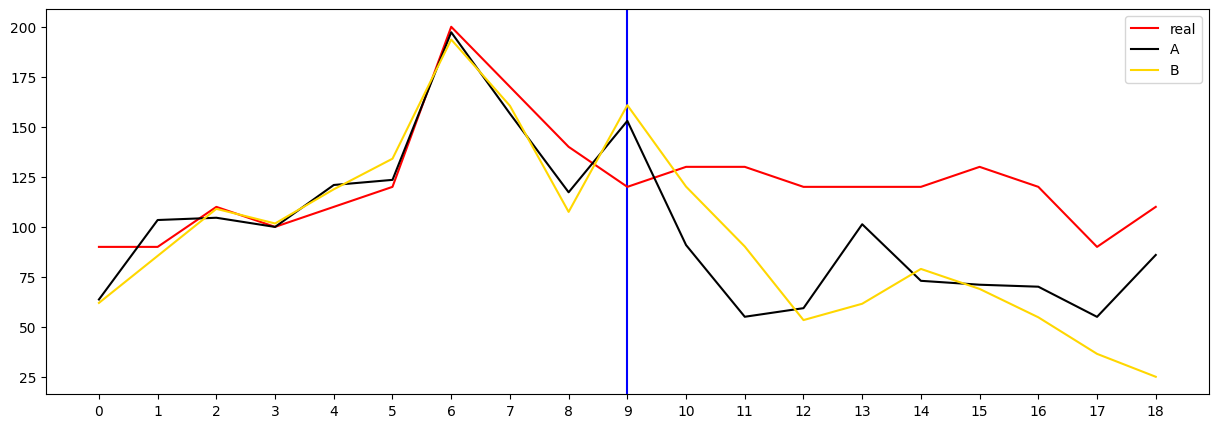

Which prediction is better? (A/B/skip): s


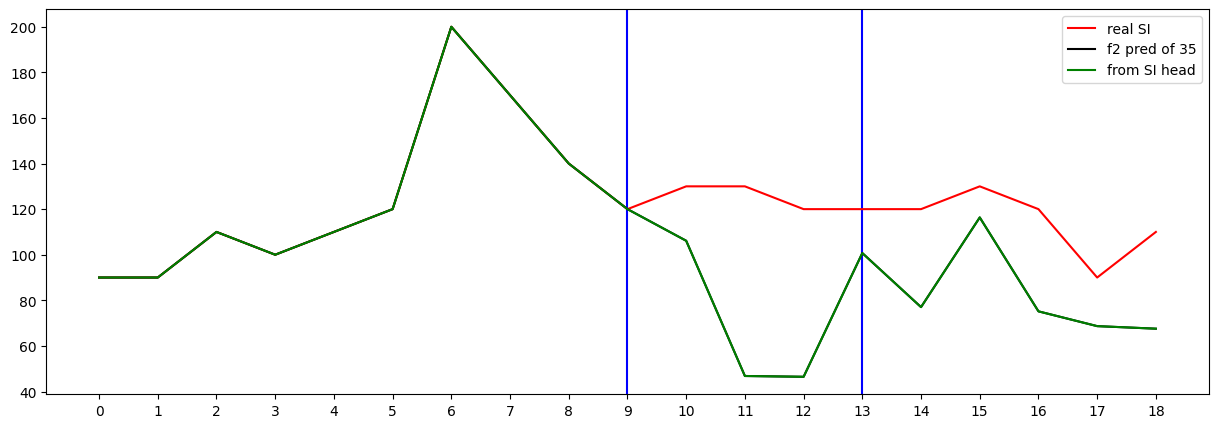

Testing R**2 - (all) - (no inputs):  0.9943958483790863
Testing R**2 - (f2) - SI full (no inputs):  -8.306939932201164
Testing R**2 - SI head only (no inputs):  -8.306939932201164
0 ...index R**2 (no inputs):  -0.4909952028096123
1 ...index R**2 (no inputs):  -4.541140002245868
2 ...index R**2 (no inputs):  -8.306939932201164
3 ...index R**2 (no inputs):  -186.3802998036488
4 ...index R**2 (no inputs):  -18.215002653378466
5 ...index R**2 (no inputs):  -17.898177216294528
6 ...index R**2 (no inputs):  -4.469766307741993
7 ...index R**2 (no inputs):  -562.3552463930331
8 ...index R**2 (no inputs):  -2.905203567871973
9 ...index R**2 (no inputs):  -218.1583919520108
10 ...index R**2 (no inputs):  -0.19822909222501872
11 ...index R**2 (no inputs):  -1.7563422608217287
12 ...index R**2 (no inputs):  -17.061332400097736
13 ...index R**2 (no inputs):  -17.813979050754725
14 ...index R**2 (no inputs):  -46.67239787772322
15 ...index R**2 (no inputs):  -29.094496321265694
16 ...index R**2 (no 

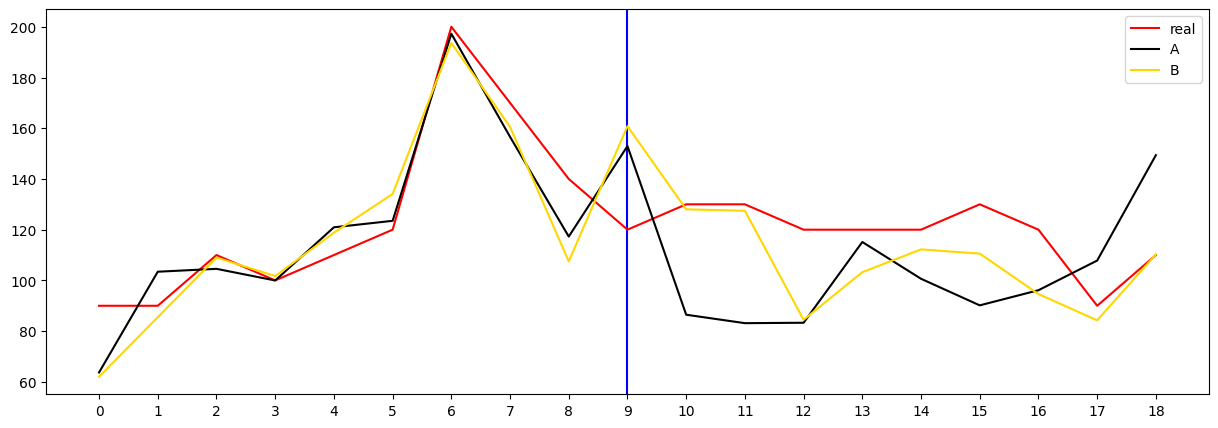

Which prediction is better? (A/B/skip): b
Saved preference.


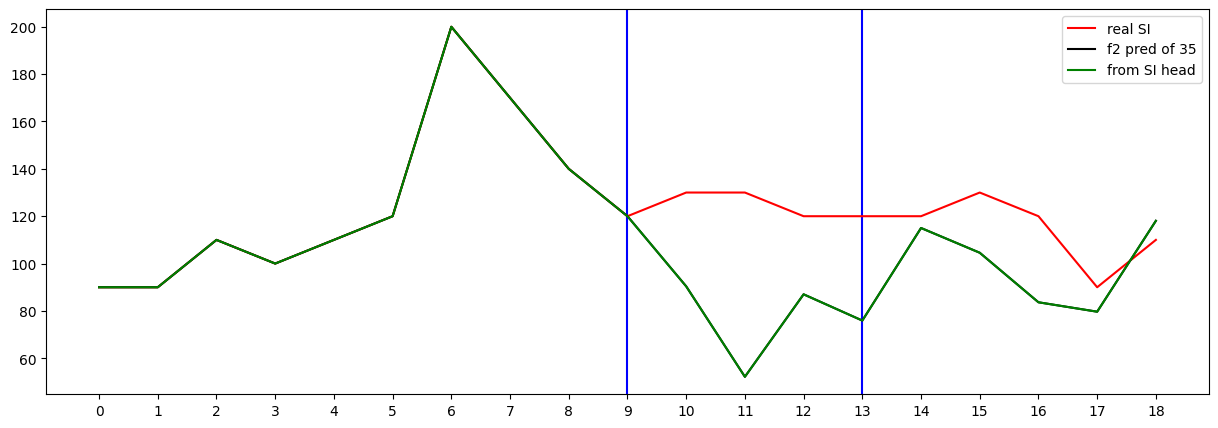

Testing R**2 - (all) - (no inputs):  0.9960779273437511
Testing R**2 - (f2) - SI full (no inputs):  -5.259817085712301
Testing R**2 - SI head only (no inputs):  -5.259817085712301
0 ...index R**2 (no inputs):  -0.01936947475084394
1 ...index R**2 (no inputs):  -49.10982830915917
2 ...index R**2 (no inputs):  -5.259817085712301
3 ...index R**2 (no inputs):  -43.0880185022392
4 ...index R**2 (no inputs):  -7.0896269476042875
5 ...index R**2 (no inputs):  -6.8372326116449145
6 ...index R**2 (no inputs):  -13.566616971351804
7 ...index R**2 (no inputs):  -46.2292657898375
8 ...index R**2 (no inputs):  -8.224661818230542
9 ...index R**2 (no inputs):  -9.487027496939719
10 ...index R**2 (no inputs):  -13.453955603113043
11 ...index R**2 (no inputs):  -0.5055528818976718
12 ...index R**2 (no inputs):  -11.227284124426667
13 ...index R**2 (no inputs):  -5.940206621848667
14 ...index R**2 (no inputs):  -17.554493756712468
15 ...index R**2 (no inputs):  -9.192996966381
16 ...index R**2 (no input

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )



[0] Train Loss: 1.359424
Loss_SI: 1.4532884359359741 Loss_all: 1.352805495262146
===
[50] Train Loss: 0.234574
Loss_SI: 0.506761372089386 Loss_all: 0.23191718757152557
===


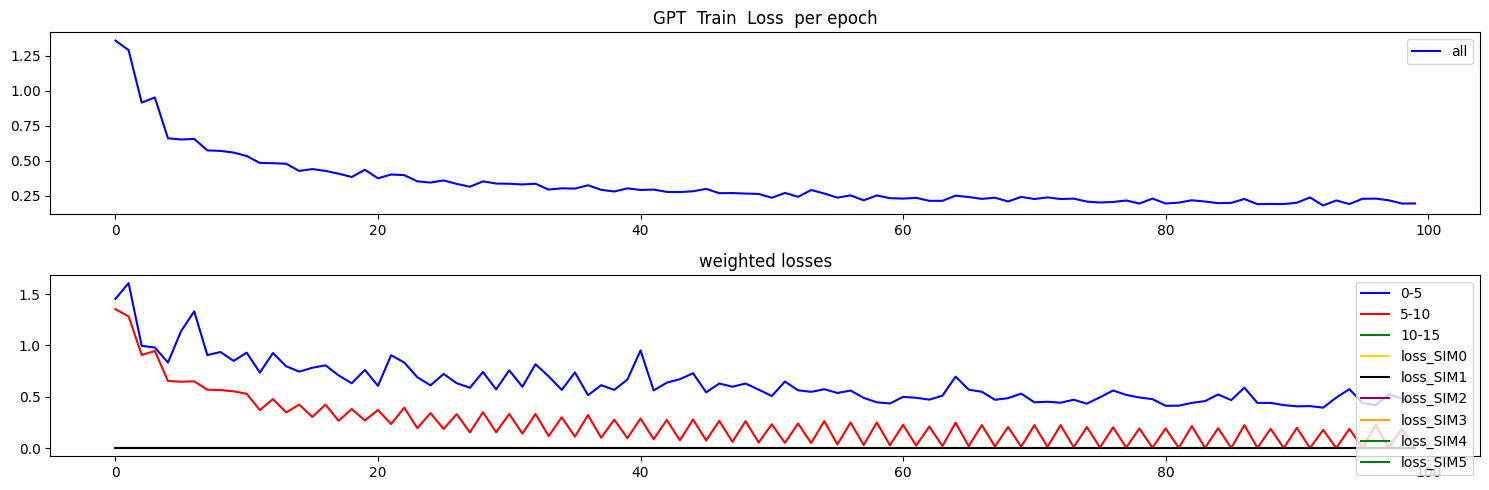

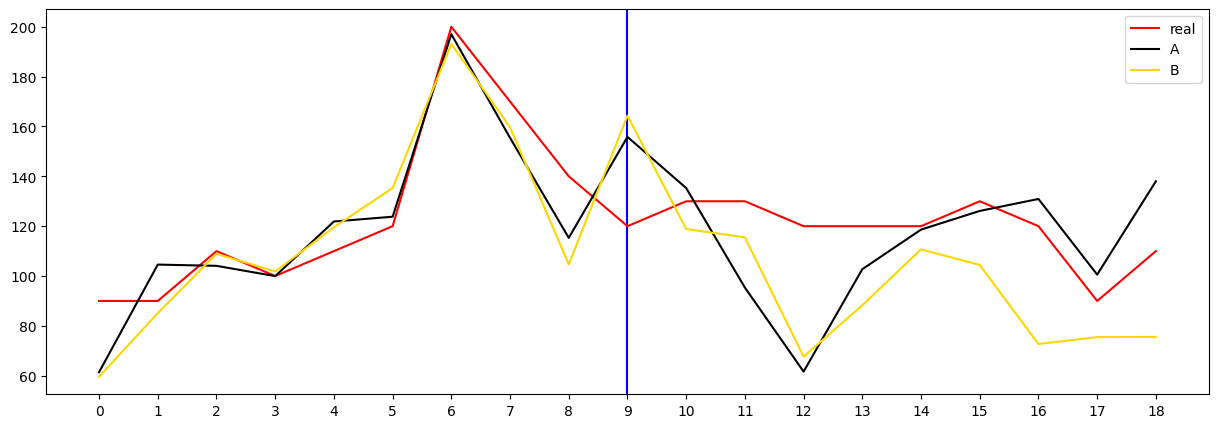

Which prediction is better? (A/B/skip): s


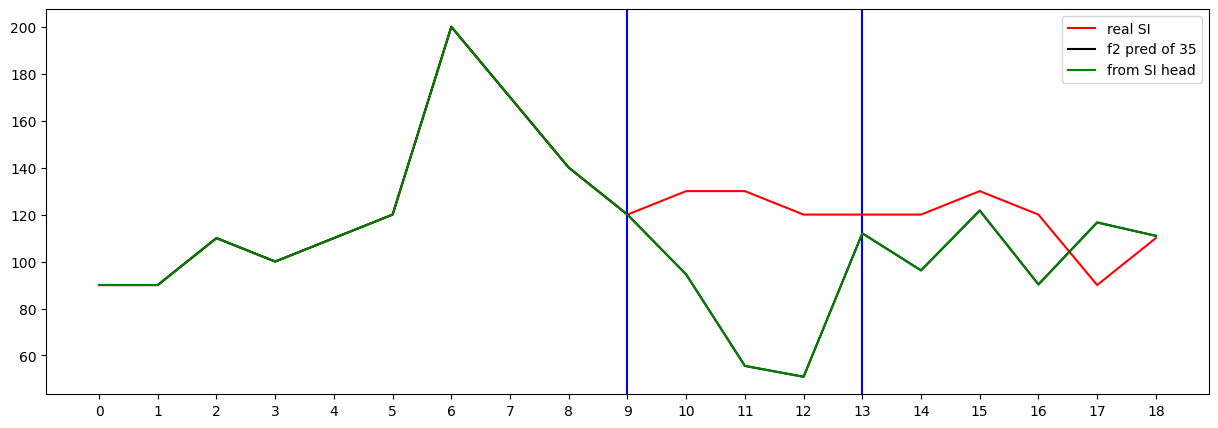

Testing R**2 - (all) - (no inputs):  0.9956801971820316
Testing R**2 - (f2) - SI full (no inputs):  -5.5175553083672435
Testing R**2 - SI head only (no inputs):  -5.5175553083672435
0 ...index R**2 (no inputs):  -0.31027131012910103
1 ...index R**2 (no inputs):  -4.913887795120895
2 ...index R**2 (no inputs):  -5.5175553083672435
3 ...index R**2 (no inputs):  -19.4209331419156
4 ...index R**2 (no inputs):  -16.327704216233148
5 ...index R**2 (no inputs):  -4.077197703908034
6 ...index R**2 (no inputs):  -2.80366510182983
7 ...index R**2 (no inputs):  -165.24638809545786
8 ...index R**2 (no inputs):  -0.5727801936839438
9 ...index R**2 (no inputs):  -221.2718604079578
10 ...index R**2 (no inputs):  -2.256509333374995
11 ...index R**2 (no inputs):  -1.4648216306038595
12 ...index R**2 (no inputs):  -16.459134885366375
13 ...index R**2 (no inputs):  -16.124585426634795
14 ...index R**2 (no inputs):  -29.31274585207375
15 ...index R**2 (no inputs):  -36.28863476894326
16 ...index R**2 (no 

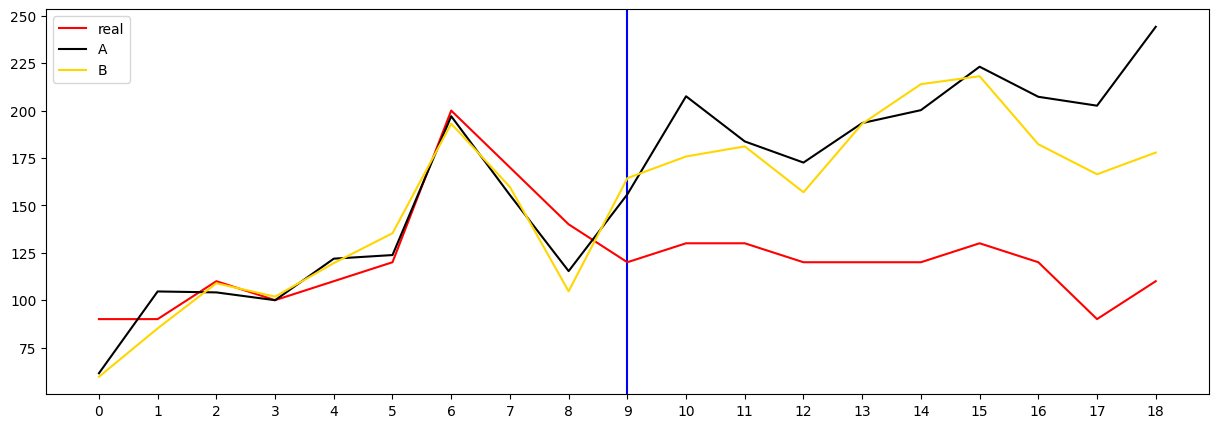

Which prediction is better? (A/B/skip): b
Saved preference.


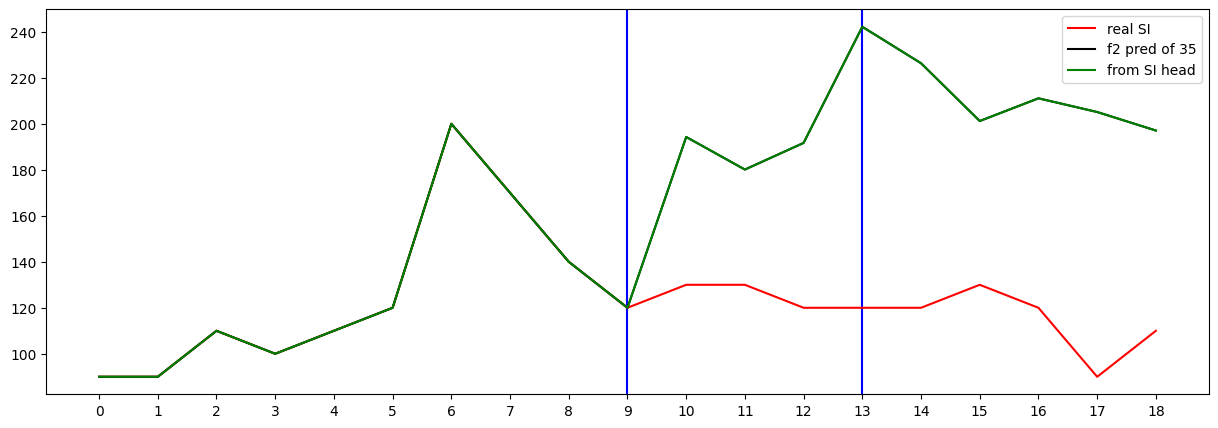

Testing R**2 - (all) - (no inputs):  0.9807029065100541
Testing R**2 - (f2) - SI full (no inputs):  -42.28306319787666
Testing R**2 - SI head only (no inputs):  -42.28306319787666
0 ...index R**2 (no inputs):  -0.0045715019724337225
1 ...index R**2 (no inputs):  -8.38202636752462
2 ...index R**2 (no inputs):  -42.28306319787666
3 ...index R**2 (no inputs):  -39.37263771808088
4 ...index R**2 (no inputs):  -21.970868527721063
5 ...index R**2 (no inputs):  -25.534359872845243
6 ...index R**2 (no inputs):  -7.705987095811105
7 ...index R**2 (no inputs):  -57.3406472190449
8 ...index R**2 (no inputs):  -4.377634339722598
9 ...index R**2 (no inputs):  -45.28094707645307
10 ...index R**2 (no inputs):  -5.937612569658699
11 ...index R**2 (no inputs):  -6.015308339468421
12 ...index R**2 (no inputs):  -5.958796404681037
13 ...index R**2 (no inputs):  -6.787867686127599
14 ...index R**2 (no inputs):  -43.21022561661326
15 ...index R**2 (no inputs):  -8.611982094121599
16 ...index R**2 (no input

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )



[0] Train Loss: 1.375900
Loss_SI: 1.3758119344711304 Loss_all: 1.369356632232666
===
[50] Train Loss: 0.268765
Loss_SI: 0.681876003742218 Loss_all: 0.2659637928009033
===


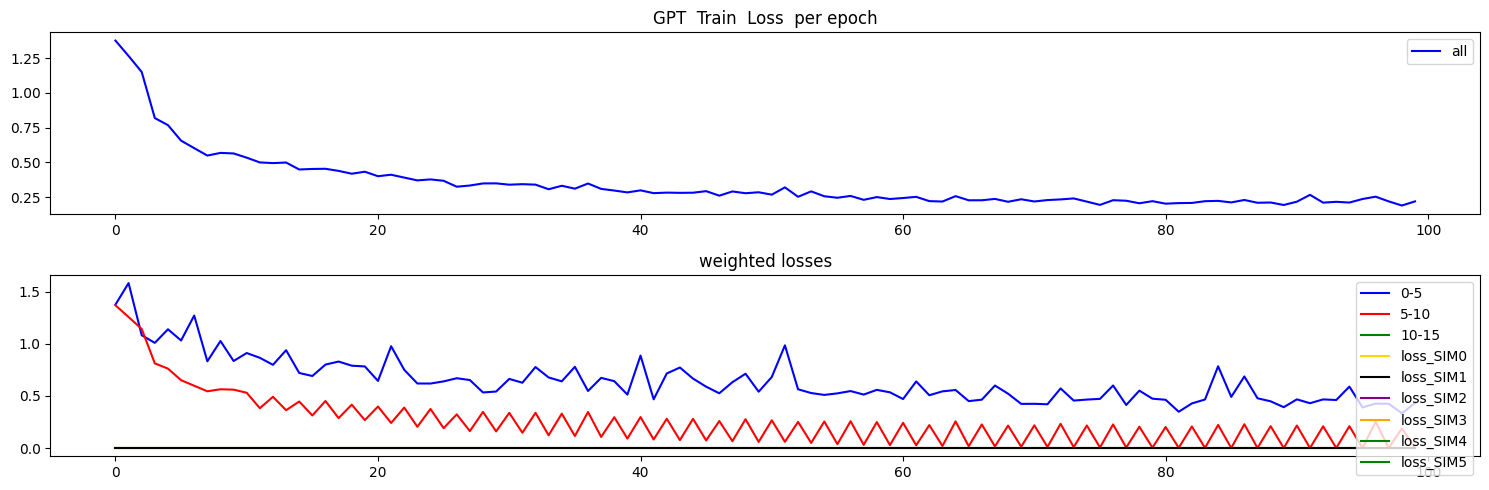

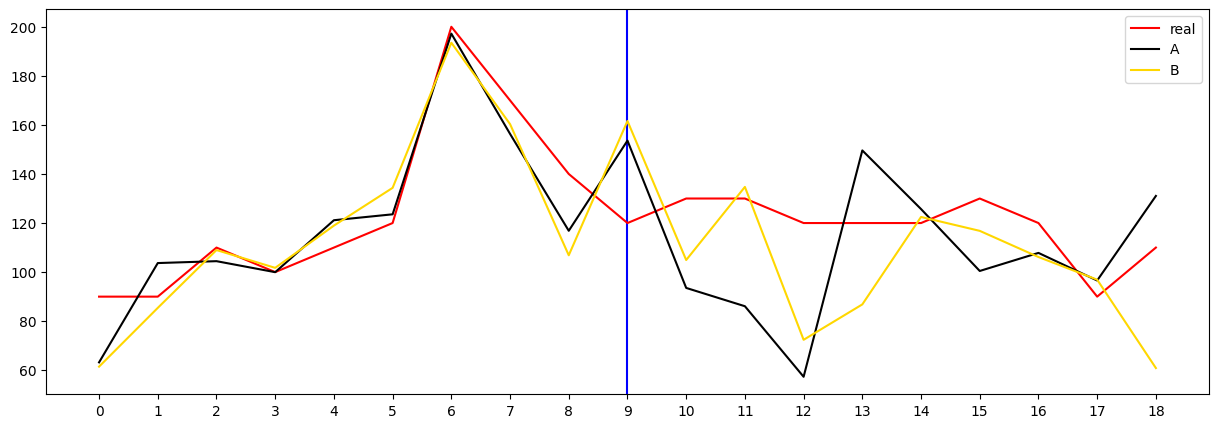

Which prediction is better? (A/B/skip): s


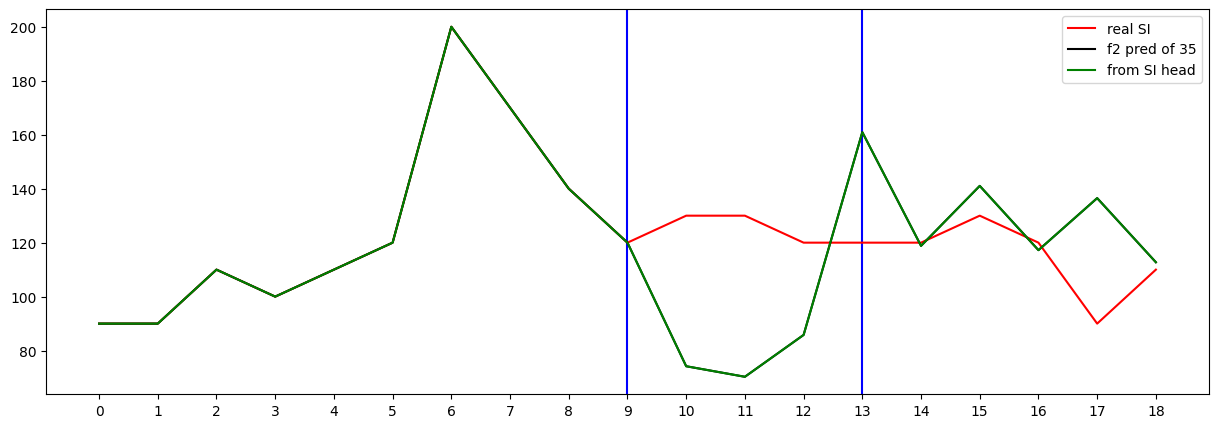

Testing R**2 - (all) - (no inputs):  0.9960542487714515
Testing R**2 - (f2) - SI full (no inputs):  -5.012618614639099
Testing R**2 - SI head only (no inputs):  -5.012618614639099
0 ...index R**2 (no inputs):  -0.2467781445453725
1 ...index R**2 (no inputs):  -5.961430358922549
2 ...index R**2 (no inputs):  -5.012618614639099
3 ...index R**2 (no inputs):  -47.12499070133964
4 ...index R**2 (no inputs):  -61.78983470431791
5 ...index R**2 (no inputs):  -17.831651057397362
6 ...index R**2 (no inputs):  -1.6520859101902978
7 ...index R**2 (no inputs):  -105.04268849513619
8 ...index R**2 (no inputs):  -1.1865927678366326
9 ...index R**2 (no inputs):  -224.89014753129433
10 ...index R**2 (no inputs):  -1.0544178853626538
11 ...index R**2 (no inputs):  -0.8790833001532248
12 ...index R**2 (no inputs):  -22.37201546145869
13 ...index R**2 (no inputs):  -12.567898159926347
14 ...index R**2 (no inputs):  -53.50488637903313
15 ...index R**2 (no inputs):  -26.579690642529787
16 ...index R**2 (no

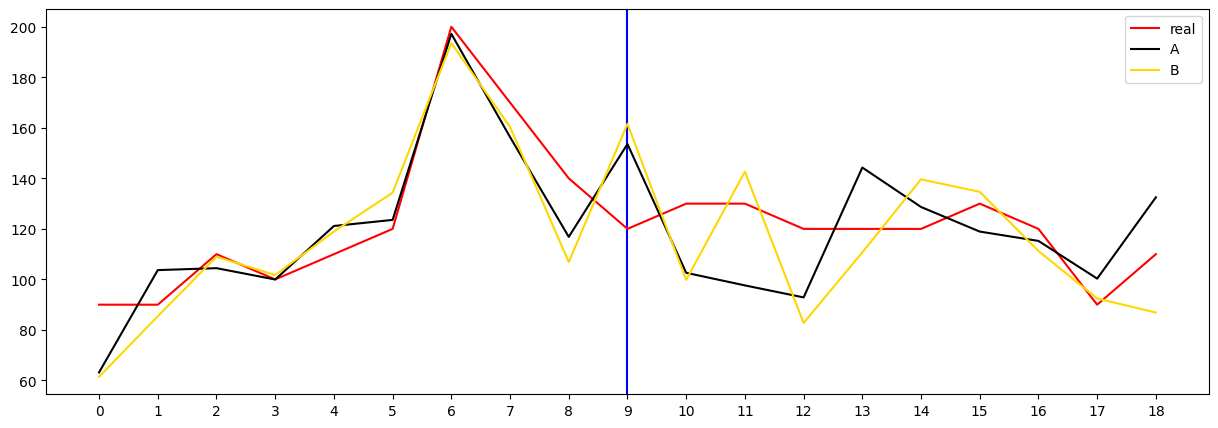

Which prediction is better? (A/B/skip): s


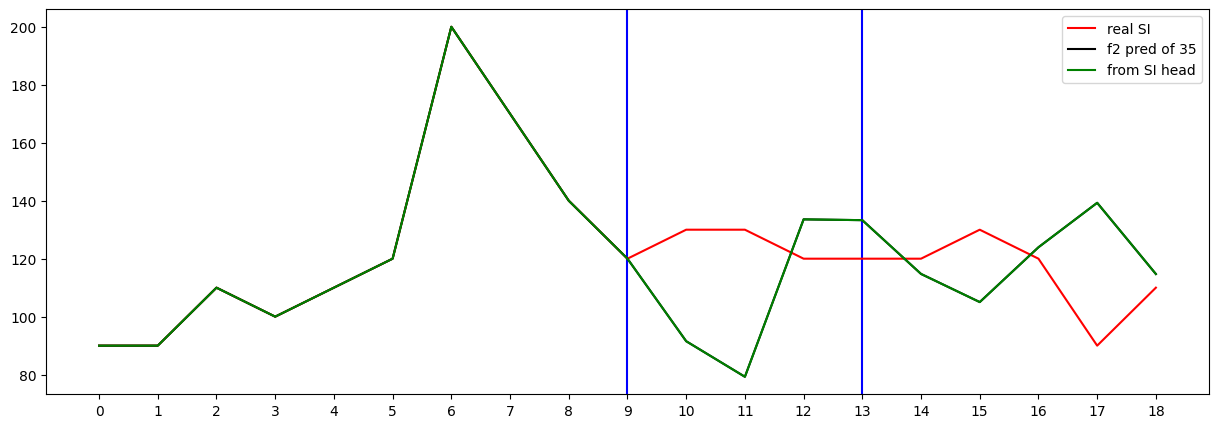

Testing R**2 - (all) - (no inputs):  0.996970369701568
Testing R**2 - (f2) - SI full (no inputs):  -2.6090782903997645
Testing R**2 - SI head only (no inputs):  -2.6090782903997645
0 ...index R**2 (no inputs):  -0.1963980188228973
1 ...index R**2 (no inputs):  -24.698818390681378
2 ...index R**2 (no inputs):  -2.6090782903997645
3 ...index R**2 (no inputs):  -910.5482869550309
4 ...index R**2 (no inputs):  -49.736444432497706
5 ...index R**2 (no inputs):  -95.67663299464473
6 ...index R**2 (no inputs):  -73.63796958531923
7 ...index R**2 (no inputs):  -847.4024194273941
8 ...index R**2 (no inputs):  -5.968939089768163
9 ...index R**2 (no inputs):  -232.97550200211083
10 ...index R**2 (no inputs):  -6.3608886767317365
11 ...index R**2 (no inputs):  -0.7482174464254403
12 ...index R**2 (no inputs):  -14.485342964255391
13 ...index R**2 (no inputs):  -8.54551217984648
14 ...index R**2 (no inputs):  -58.75837603264771
15 ...index R**2 (no inputs):  -13.054349085071808
16 ...index R**2 (no 

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )




## Run 3


In [43]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.292463
Loss_SI: 1.2660630941390991 Loss_all: 1.2858940362930298
===
[50] Train Loss: 0.187869
Loss_SI: 0.284212201833725 Loss_all: 0.18218611180782318
===


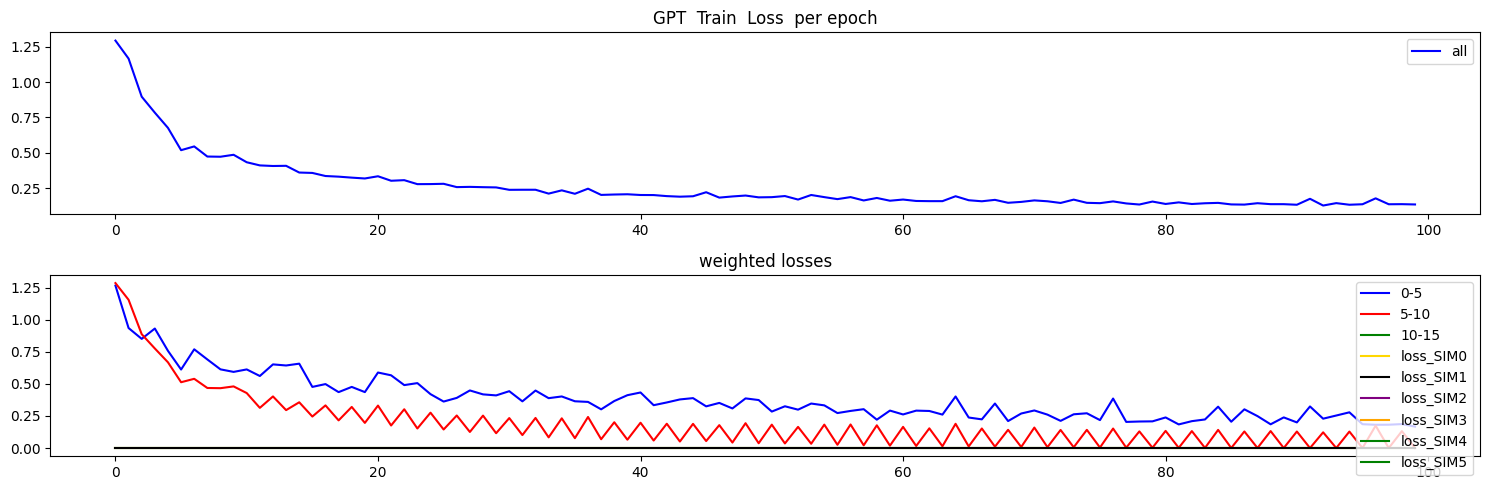

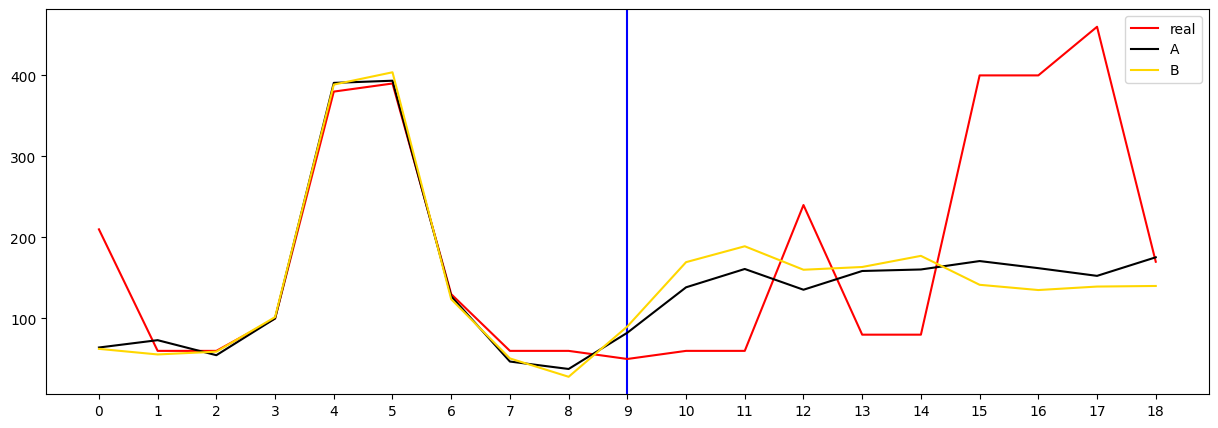

Which prediction is better? (A/B/skip): s


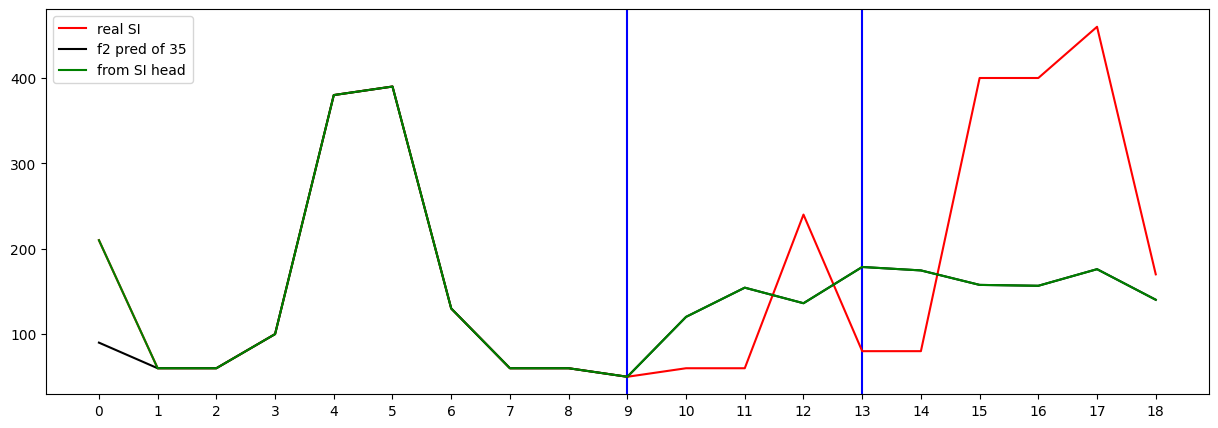

Testing R**2 - (all) - (no inputs):  0.9530400038045775
Testing R**2 - (f2) - SI full (no inputs):  -0.22132118484487528
Testing R**2 - SI head only (no inputs):  -0.22132118484487528
0 ...index R**2 (no inputs):  -2.2281481042784708
1 ...index R**2 (no inputs):  -3.9317171319126167
2 ...index R**2 (no inputs):  -0.22132118484487528
3 ...index R**2 (no inputs):  -0.17189182790420587
4 ...index R**2 (no inputs):  -0.0792947251975864
5 ...index R**2 (no inputs):  -22.320323116173235
6 ...index R**2 (no inputs):  -1.8131741801781494
7 ...index R**2 (no inputs):  -3.874186248374053
8 ...index R**2 (no inputs):  -231.5026958895491
9 ...index R**2 (no inputs):  -65.01634507343196
10 ...index R**2 (no inputs):  -36.88394917858906
11 ...index R**2 (no inputs):  -82.3244960940132
12 ...index R**2 (no inputs):  -38.51366276009979
13 ...index R**2 (no inputs):  -10.09963992854767
14 ...index R**2 (no inputs):  -162.71129515756266
15 ...index R**2 (no inputs):  -113.16790161036612
16 ...index R**2

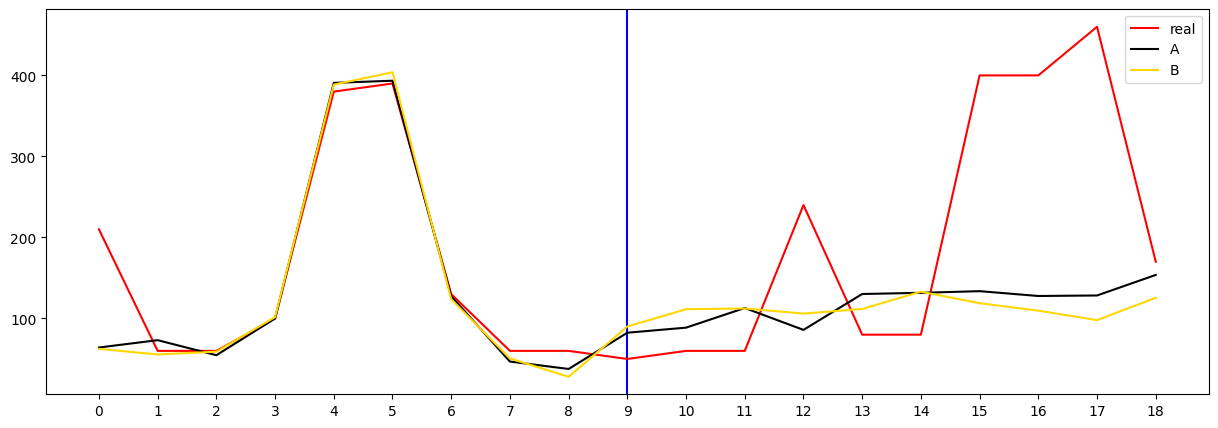

Which prediction is better? (A/B/skip): s


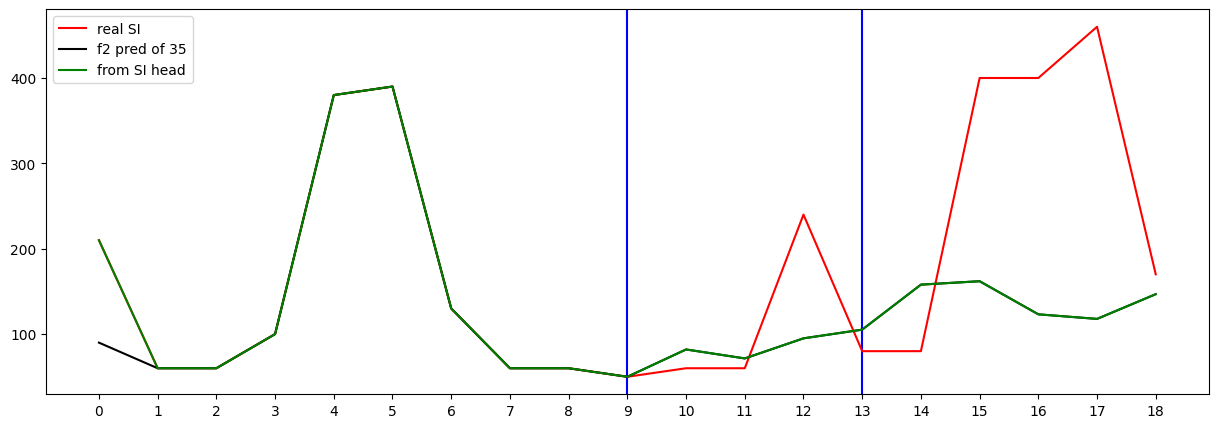

Testing R**2 - (all) - (no inputs):  0.9458845496289496
Testing R**2 - (f2) - SI full (no inputs):  -0.40613570900698326
Testing R**2 - SI head only (no inputs):  -0.40613570900698326
0 ...index R**2 (no inputs):  -2.964507170084466
1 ...index R**2 (no inputs):  -5.261230666658228
2 ...index R**2 (no inputs):  -0.40613570900698326
3 ...index R**2 (no inputs):  -21.93210746512714
4 ...index R**2 (no inputs):  -3.3185576077657437
5 ...index R**2 (no inputs):  -177.2962881462676
6 ...index R**2 (no inputs):  -36.00964719243001
7 ...index R**2 (no inputs):  -93.45449407856148
8 ...index R**2 (no inputs):  -17448.158623535524
9 ...index R**2 (no inputs):  -925.2741189413307
10 ...index R**2 (no inputs):  -112.34054151283446
11 ...index R**2 (no inputs):  -146.38929968328708
12 ...index R**2 (no inputs):  -25.72983993034954
13 ...index R**2 (no inputs):  -22.363333654594772
14 ...index R**2 (no inputs):  -2845.4041477449173
15 ...index R**2 (no inputs):  -778.3138715702106
16 ...index R**2 (

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk400to500_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.333732
Loss_SI: 1.381912112236023 Loss_all: 1.3271558284759521
===
[50] Train Loss: 0.224957
Loss_SI: 0.5778889656066895 Loss_all: 0.221204936504364
===


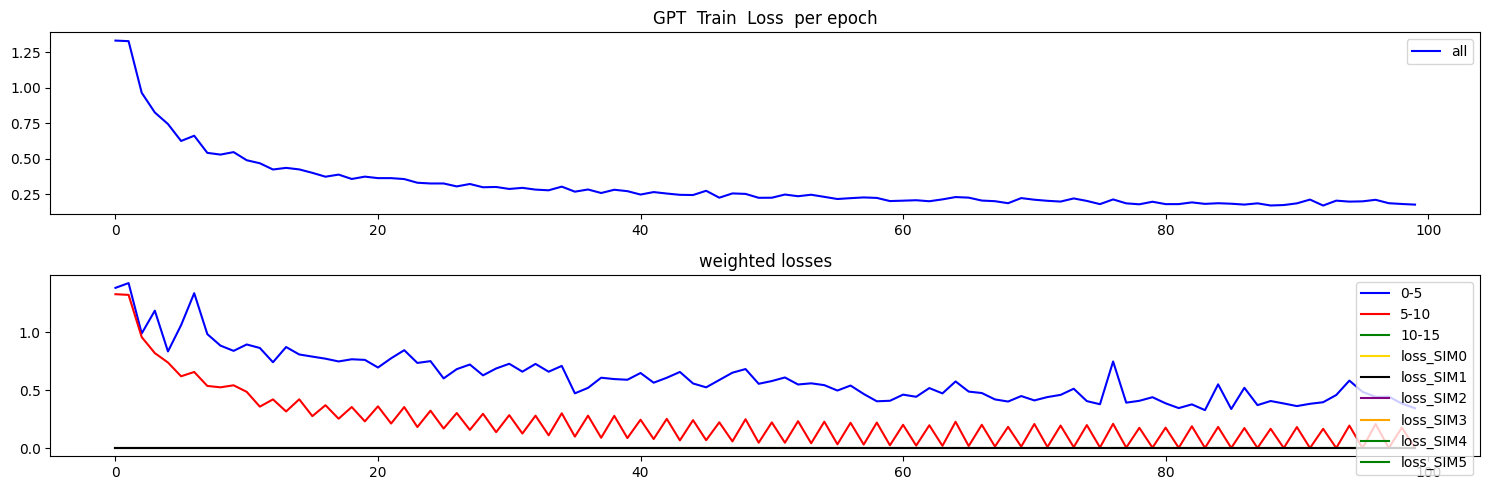

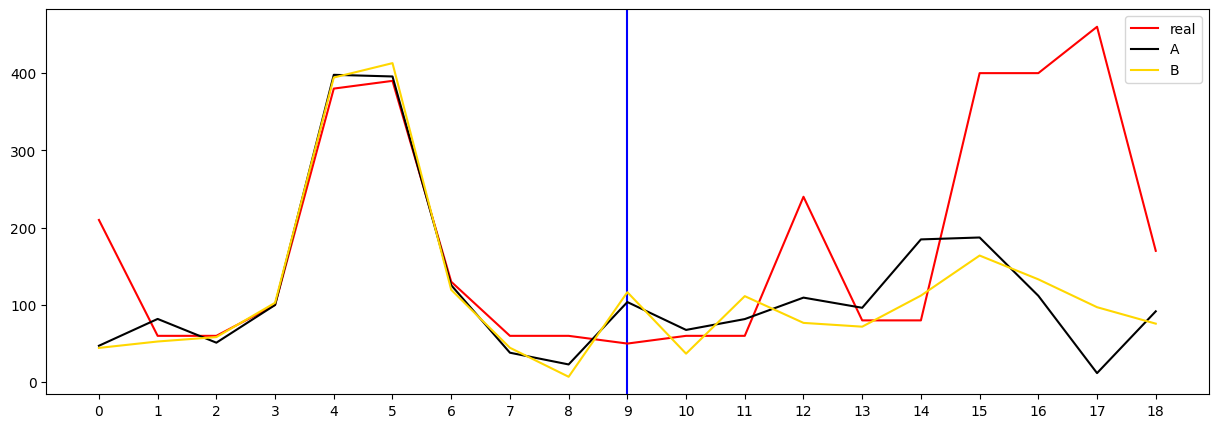

Which prediction is better? (A/B/skip): s


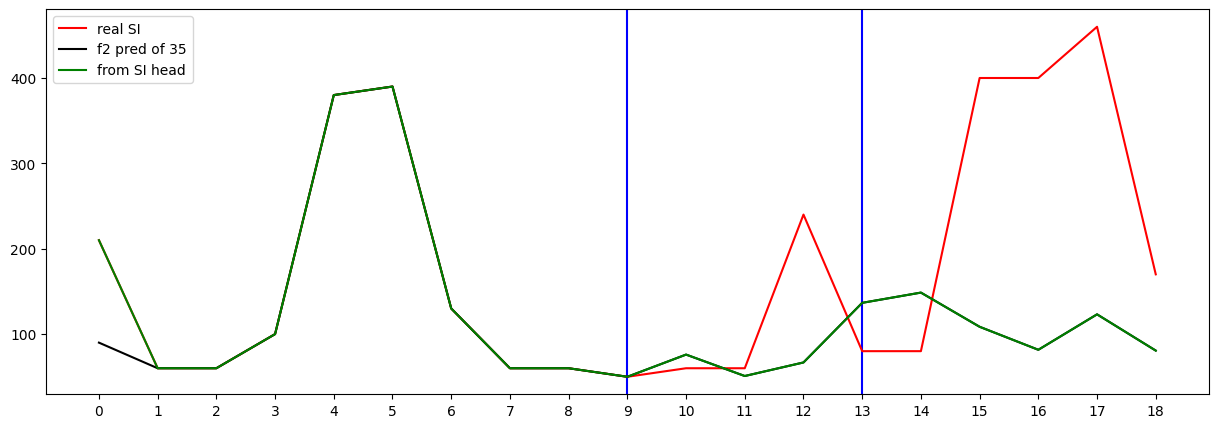

Testing R**2 - (all) - (no inputs):  0.9297367686075015
Testing R**2 - (f2) - SI full (no inputs):  -0.8537823353537577
Testing R**2 - SI head only (no inputs):  -0.8537823353537577
0 ...index R**2 (no inputs):  -1.1643411904360819
1 ...index R**2 (no inputs):  -20.15847732072134
2 ...index R**2 (no inputs):  -0.8537823353537577
3 ...index R**2 (no inputs):  -7.6227645791836895
4 ...index R**2 (no inputs):  -11.428639664335126
5 ...index R**2 (no inputs):  -103.85442790888177
6 ...index R**2 (no inputs):  -12.684398574232386
7 ...index R**2 (no inputs):  -6.674821294240196
8 ...index R**2 (no inputs):  -575.3292994389013
9 ...index R**2 (no inputs):  -42.4096386159608
10 ...index R**2 (no inputs):  -6.1769798348331975
11 ...index R**2 (no inputs):  -209.87114463799682
12 ...index R**2 (no inputs):  -38.952968628637834
13 ...index R**2 (no inputs):  -33.01939068346989
14 ...index R**2 (no inputs):  -106.03440286728932
15 ...index R**2 (no inputs):  -179.5083310195044
16 ...index R**2 (n

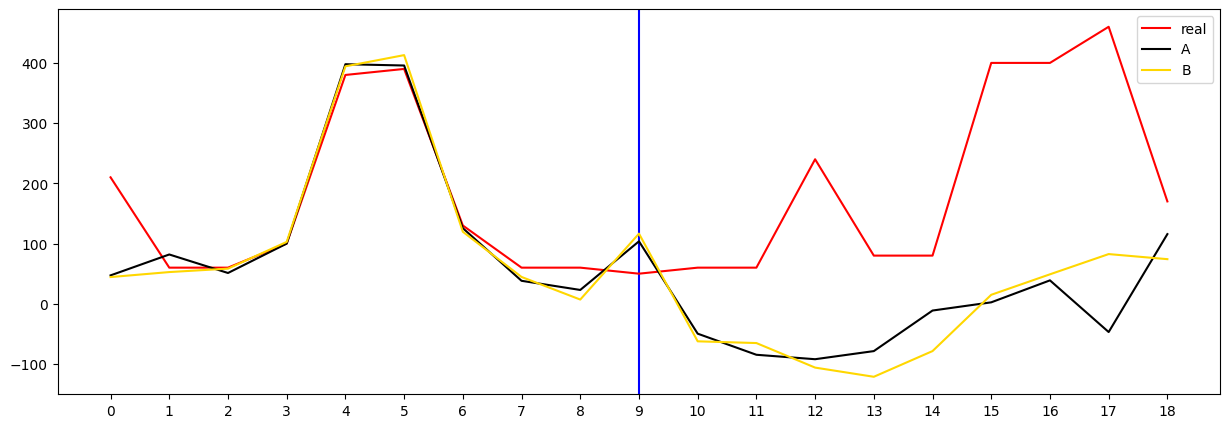

Which prediction is better? (A/B/skip): s


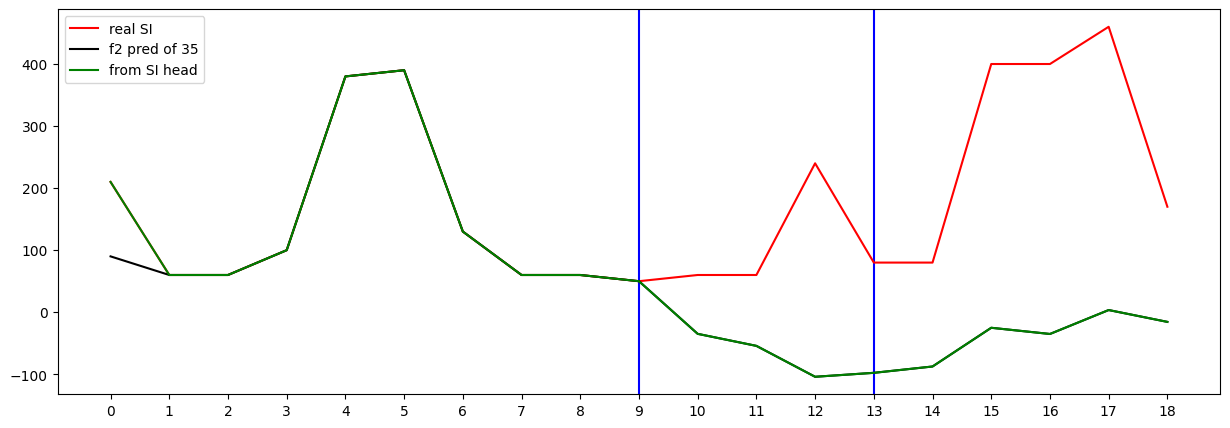

Testing R**2 - (all) - (no inputs):  0.8206712382418831
Testing R**2 - (f2) - SI full (no inputs):  -3.7876515895834215
Testing R**2 - SI head only (no inputs):  -3.7876515895834215
0 ...index R**2 (no inputs):  -0.03526969836159255
1 ...index R**2 (no inputs):  -428.7632652170206
2 ...index R**2 (no inputs):  -3.7876515895834215
3 ...index R**2 (no inputs):  -48.100016183000534
4 ...index R**2 (no inputs):  -50.120649829812436
5 ...index R**2 (no inputs):  -2068.717081823489
6 ...index R**2 (no inputs):  -24.84487548352185
7 ...index R**2 (no inputs):  -277.29165469929046
8 ...index R**2 (no inputs):  -29703.965334300257
9 ...index R**2 (no inputs):  -275.36011887260946
10 ...index R**2 (no inputs):  -101.27600326169866
11 ...index R**2 (no inputs):  -2227.097394263874
12 ...index R**2 (no inputs):  -7.637584372860305
13 ...index R**2 (no inputs):  -216.74949057655078
14 ...index R**2 (no inputs):  -882.819526120195
15 ...index R**2 (no inputs):  -1664.5304167600107
16 ...index R**2 (

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to500_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )




[0] Train Loss: 1.333335
Loss_SI: 1.3727467060089111 Loss_all: 1.326741337776184
===
[50] Train Loss: 0.229699
Loss_SI: 0.47166305780410767 Loss_all: 0.22670136392116547
===


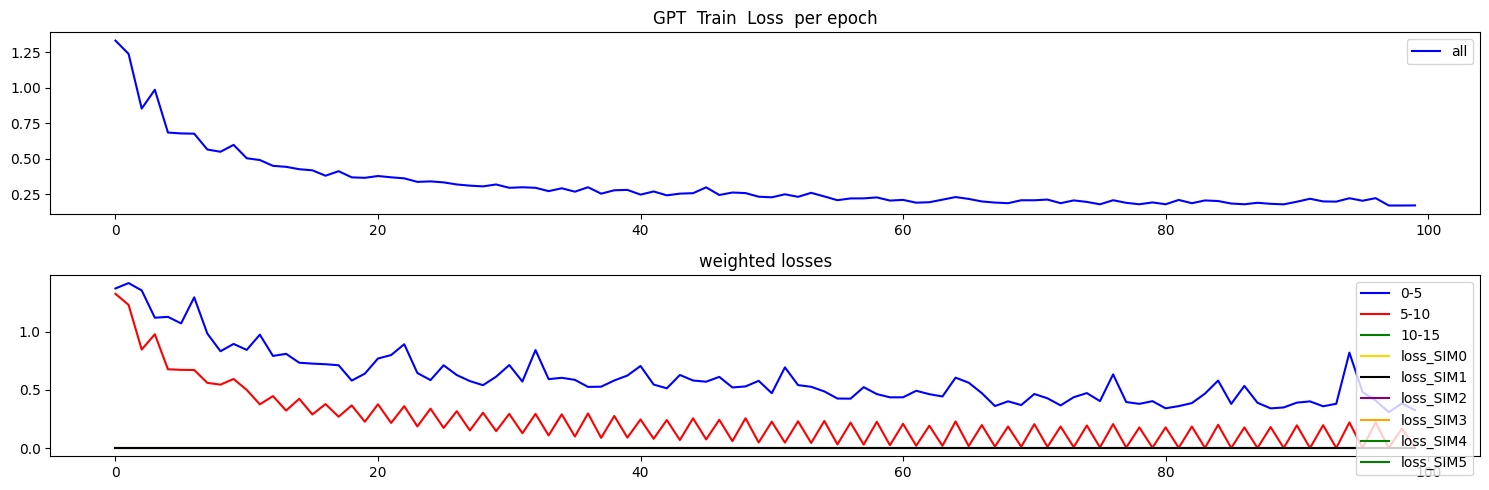

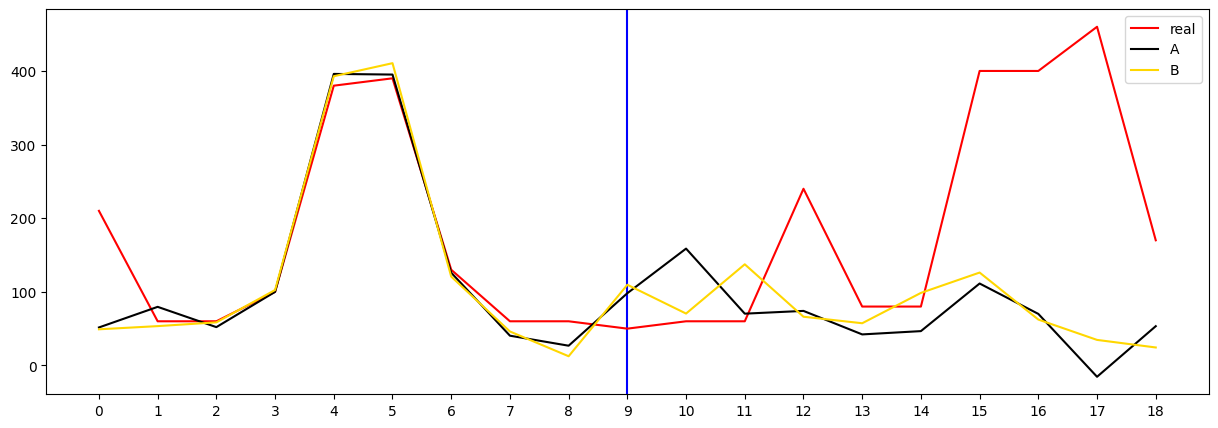

Which prediction is better? (A/B/skip): b
Saved preference.


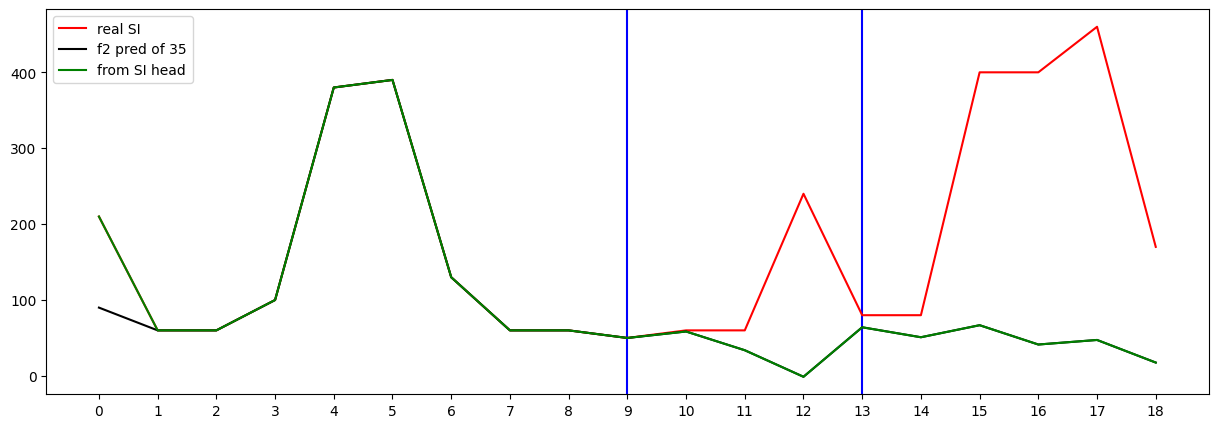

Testing R**2 - (all) - (no inputs):  0.8981433268895438
Testing R**2 - (f2) - SI full (no inputs):  -1.7015588737460305
Testing R**2 - SI head only (no inputs):  -1.7015588737460305
0 ...index R**2 (no inputs):  -0.3809608382654266
1 ...index R**2 (no inputs):  -6.736633251921728
2 ...index R**2 (no inputs):  -1.7015588737460305
3 ...index R**2 (no inputs):  -4.532192307070469
4 ...index R**2 (no inputs):  -5.154040832829851
5 ...index R**2 (no inputs):  -21.359085119711143
6 ...index R**2 (no inputs):  -36.59698165131885
7 ...index R**2 (no inputs):  -2.9341004263655477
8 ...index R**2 (no inputs):  -1033.0329088530739
9 ...index R**2 (no inputs):  -58.46468567227016
10 ...index R**2 (no inputs):  -20.461354275231418
11 ...index R**2 (no inputs):  -35.806600218307715
12 ...index R**2 (no inputs):  -7.379945857515928
13 ...index R**2 (no inputs):  -16.785104237678734
14 ...index R**2 (no inputs):  -65.96484846228276
15 ...index R**2 (no inputs):  -271.98984449302554
16 ...index R**2 (n

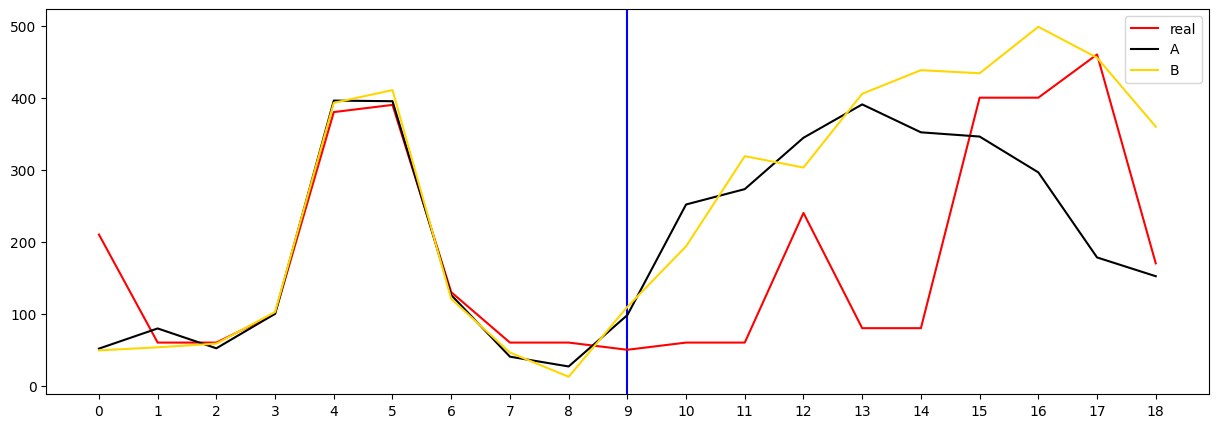

Which prediction is better? (A/B/skip): s


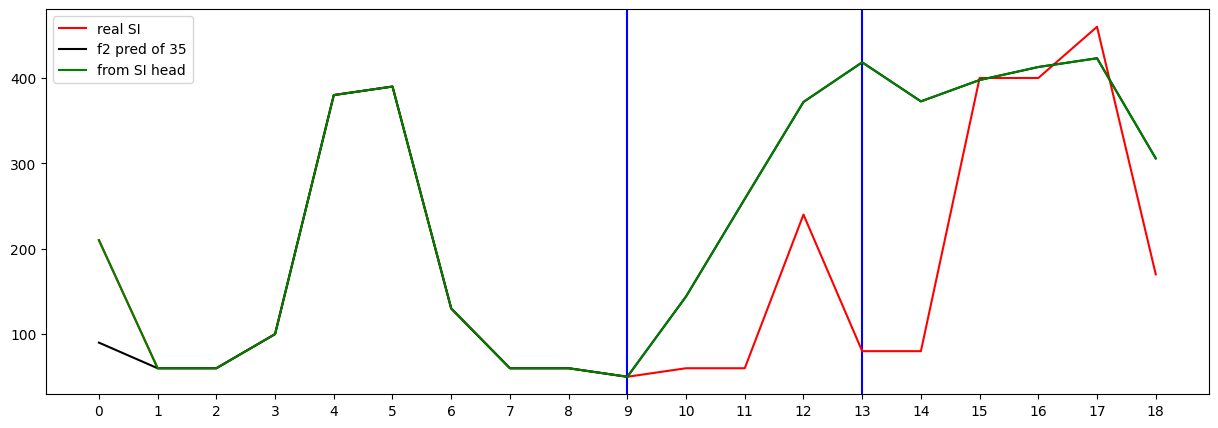

Testing R**2 - (all) - (no inputs):  0.9415536578804362
Testing R**2 - (f2) - SI full (no inputs):  -0.5023733176200884
Testing R**2 - SI head only (no inputs):  -0.5023733176200884
0 ...index R**2 (no inputs):  -12.261071414102828
1 ...index R**2 (no inputs):  -33.91009182299591
2 ...index R**2 (no inputs):  -0.5023733176200884
3 ...index R**2 (no inputs):  -17.997331556652295
4 ...index R**2 (no inputs):  -1.790142016247588
5 ...index R**2 (no inputs):  -959.2950564557874
6 ...index R**2 (no inputs):  -162.3838426851144
7 ...index R**2 (no inputs):  -126.06861727580608
8 ...index R**2 (no inputs):  -4866.777864414312
9 ...index R**2 (no inputs):  -1650.406881575979
10 ...index R**2 (no inputs):  -313.50622295605496
11 ...index R**2 (no inputs):  -5632.272694512513
12 ...index R**2 (no inputs):  -126.17633614069285
13 ...index R**2 (no inputs):  -78.40810349194048
14 ...index R**2 (no inputs):  -9338.999589736852
15 ...index R**2 (no inputs):  -1132.4710294609906
16 ...index R**2 (no 

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to500_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.292546
Loss_SI: 1.309726595878601 Loss_all: 1.2859185934066772
===
[50] Train Loss: 0.240828
Loss_SI: 0.5452002882957458 Loss_all: 0.23821182548999786
===


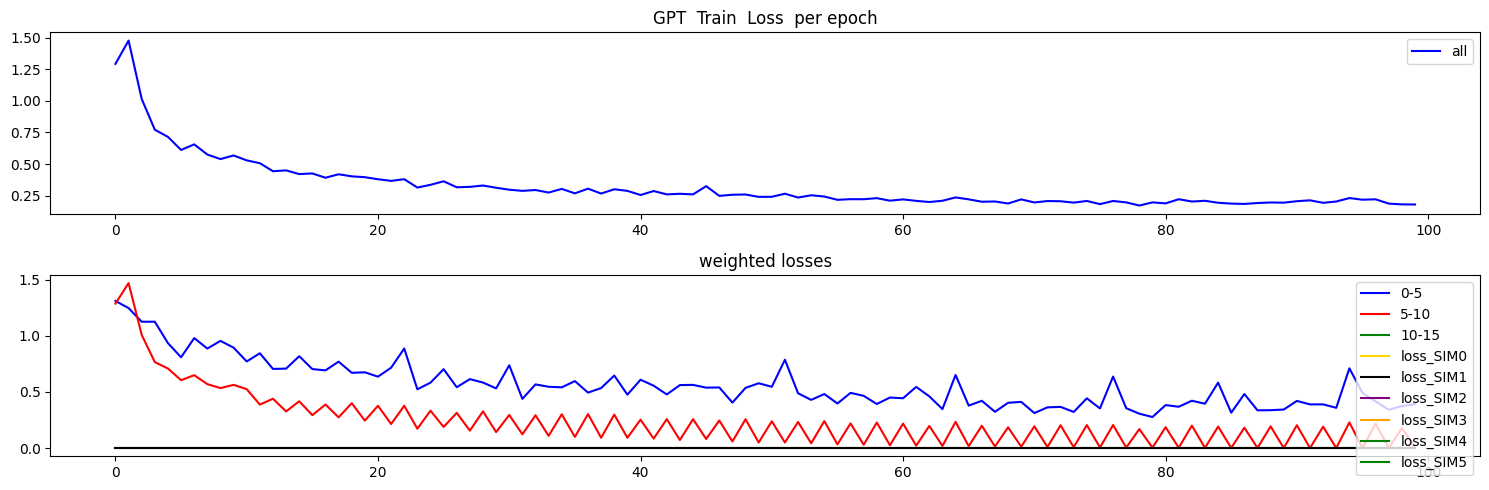

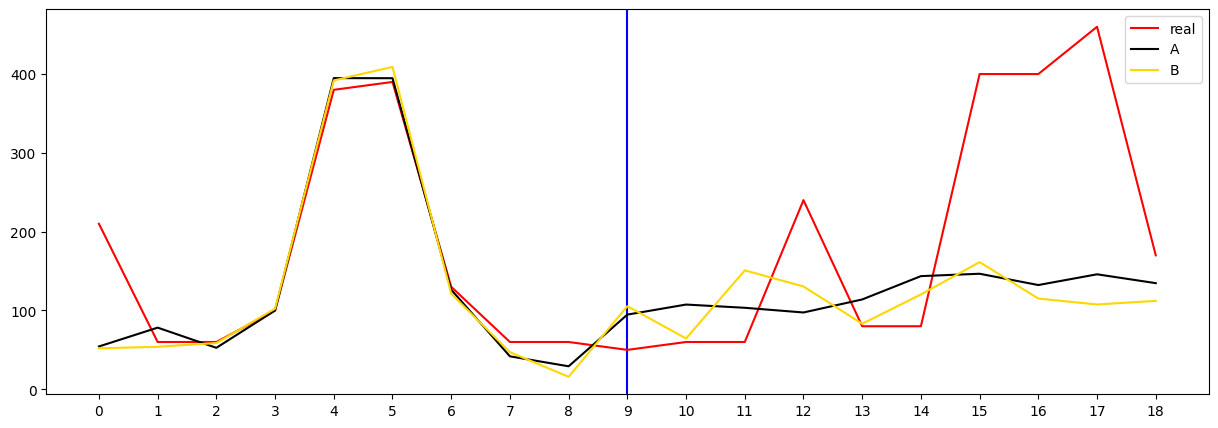

Which prediction is better? (A/B/skip): s


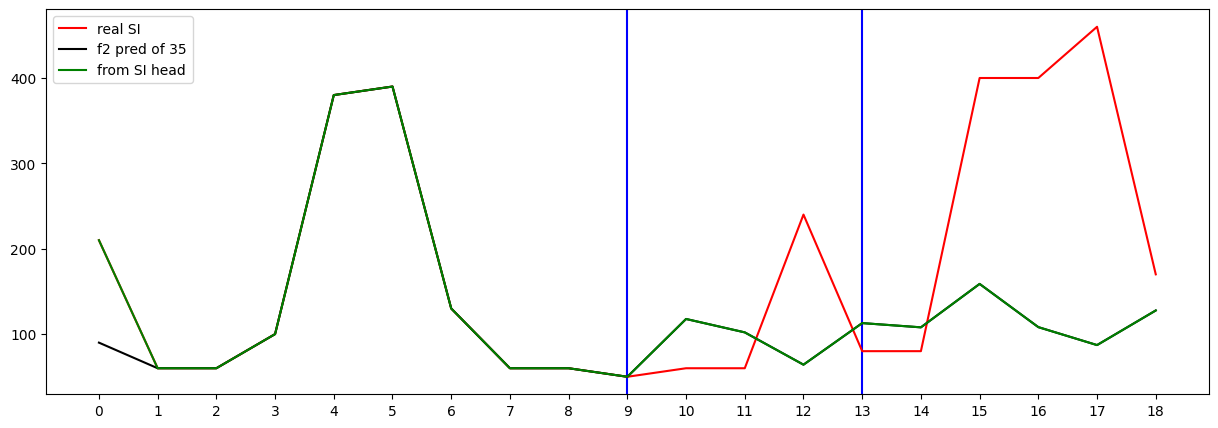

Testing R**2 - (all) - (no inputs):  0.9384380099608035
Testing R**2 - (f2) - SI full (no inputs):  -0.6152776257357195
Testing R**2 - SI head only (no inputs):  -0.6152776257357195
0 ...index R**2 (no inputs):  -0.9945829490979805
1 ...index R**2 (no inputs):  -4.455723498956934
2 ...index R**2 (no inputs):  -0.6152776257357195
3 ...index R**2 (no inputs):  -14.862394995587646
4 ...index R**2 (no inputs):  -0.7903189121899734
5 ...index R**2 (no inputs):  -124.83977631258483
6 ...index R**2 (no inputs):  -36.09160632993264
7 ...index R**2 (no inputs):  -18.747033300558975
8 ...index R**2 (no inputs):  -848.9591372308181
9 ...index R**2 (no inputs):  -106.79653233717166
10 ...index R**2 (no inputs):  -13.393667355342876
11 ...index R**2 (no inputs):  -158.49239531478744
12 ...index R**2 (no inputs):  -122.9654339009383
13 ...index R**2 (no inputs):  -76.66450967003578
14 ...index R**2 (no inputs):  -388.3600911477448
15 ...index R**2 (no inputs):  -650.5488685568124
16 ...index R**2 (n

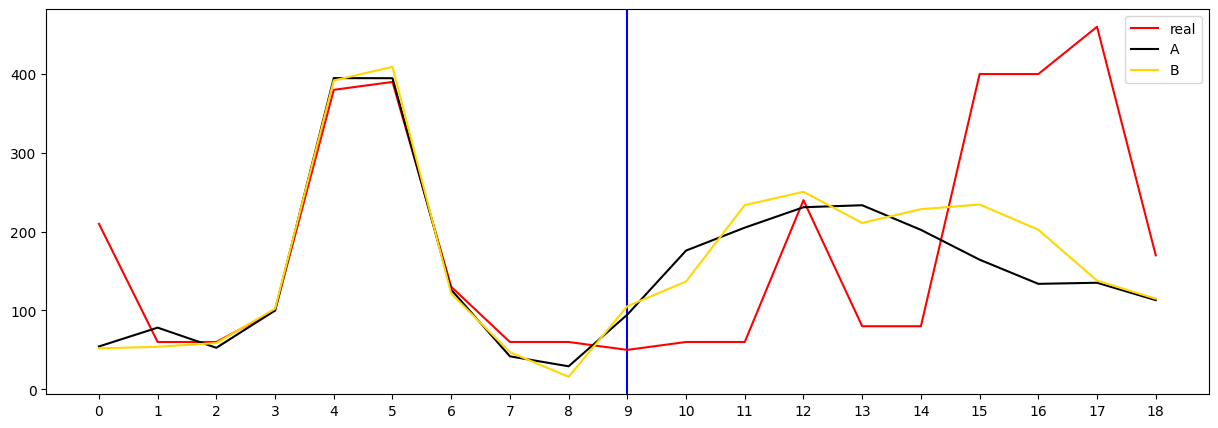

Which prediction is better? (A/B/skip): s


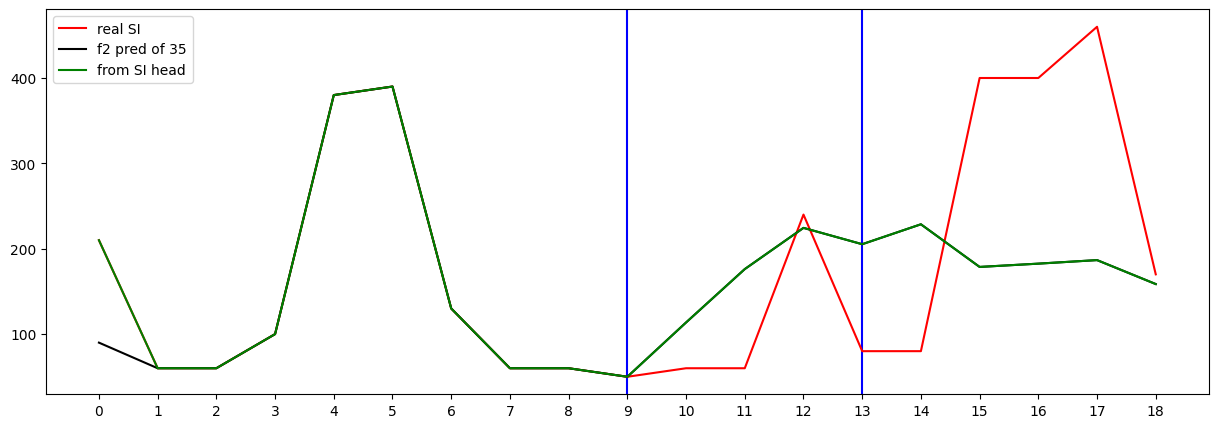

Testing R**2 - (all) - (no inputs):  0.9585135756113435
Testing R**2 - (f2) - SI full (no inputs):  -0.06984089628166923
Testing R**2 - SI head only (no inputs):  -0.06984089628166923
0 ...index R**2 (no inputs):  -1.6195683673815422
1 ...index R**2 (no inputs):  -308.0768471258552
2 ...index R**2 (no inputs):  -0.06984089628166923
3 ...index R**2 (no inputs):  -14.84431966176615
4 ...index R**2 (no inputs):  -30.00613268909546
5 ...index R**2 (no inputs):  -318.96351284389215
6 ...index R**2 (no inputs):  -59.67874717605425
7 ...index R**2 (no inputs):  -66.91743659615787
8 ...index R**2 (no inputs):  -24175.884908734228
9 ...index R**2 (no inputs):  -3372.102461754148
10 ...index R**2 (no inputs):  -580.0917671162351
11 ...index R**2 (no inputs):  -1702.1326725989468
12 ...index R**2 (no inputs):  -250.2430169601648
13 ...index R**2 (no inputs):  -28.726750801098415
14 ...index R**2 (no inputs):  -17591.092808456906
15 ...index R**2 (no inputs):  -3784.2818628801047
16 ...index R**2 

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to500_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 1.351007
Loss_SI: 1.3461583852767944 Loss_all: 1.3444185256958008
===
[50] Train Loss: 0.254590
Loss_SI: 0.5388075113296509 Loss_all: 0.25227221846580505
===


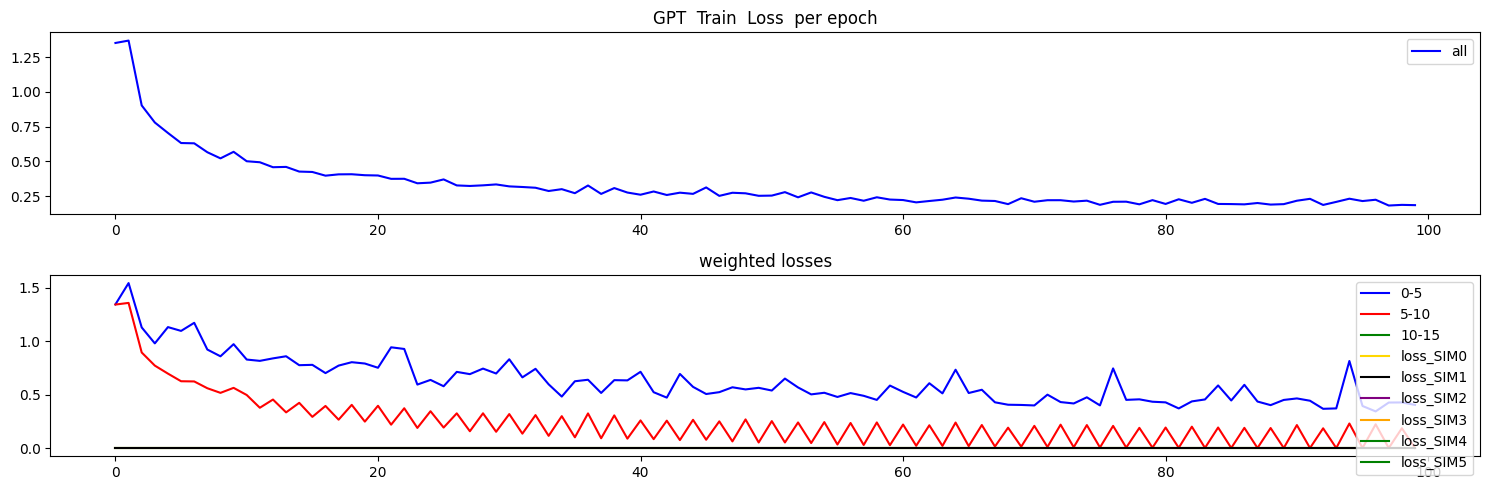

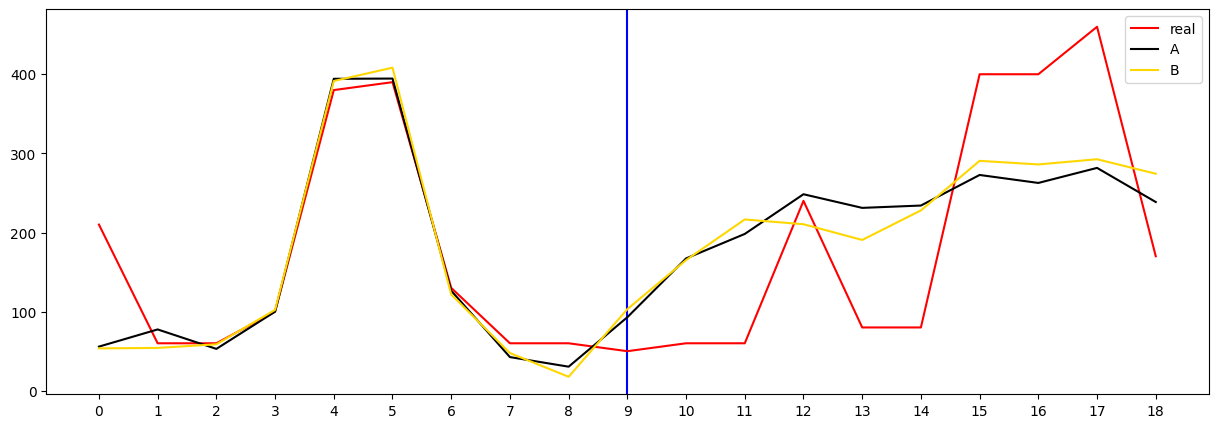

Which prediction is better? (A/B/skip): s


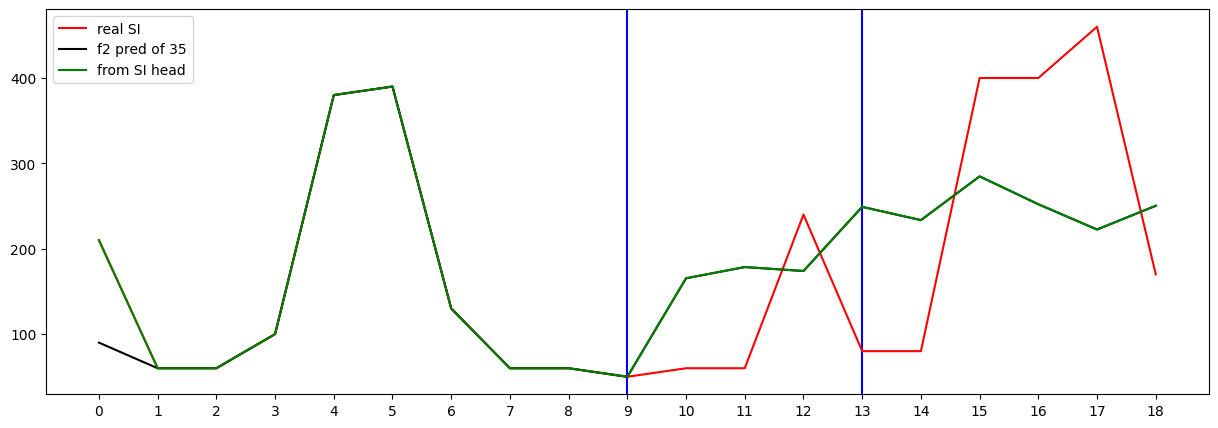

Testing R**2 - (all) - (no inputs):  0.9706290536162245
Testing R**2 - (f2) - SI full (no inputs):  0.25297001685364184
Testing R**2 - SI head only (no inputs):  0.25297001685364184
0 ...index R**2 (no inputs):  -3.0156683343615853
1 ...index R**2 (no inputs):  -8.756038799157011
2 ...index R**2 (no inputs):  0.25297001685364184
3 ...index R**2 (no inputs):  -30.36127322997819
4 ...index R**2 (no inputs):  -1.2615812018222288
5 ...index R**2 (no inputs):  -931.5771838394654
6 ...index R**2 (no inputs):  -35.749369774973076
7 ...index R**2 (no inputs):  -78.31599673471517
8 ...index R**2 (no inputs):  -4352.755388131996
9 ...index R**2 (no inputs):  -576.1958142455043
10 ...index R**2 (no inputs):  -158.6583445933934
11 ...index R**2 (no inputs):  -1298.3716709132486
12 ...index R**2 (no inputs):  -155.0279697482009
13 ...index R**2 (no inputs):  -62.82838876215749
14 ...index R**2 (no inputs):  -1141.3374036732002
15 ...index R**2 (no inputs):  -1241.1617024545133
16 ...index R**2 (no 

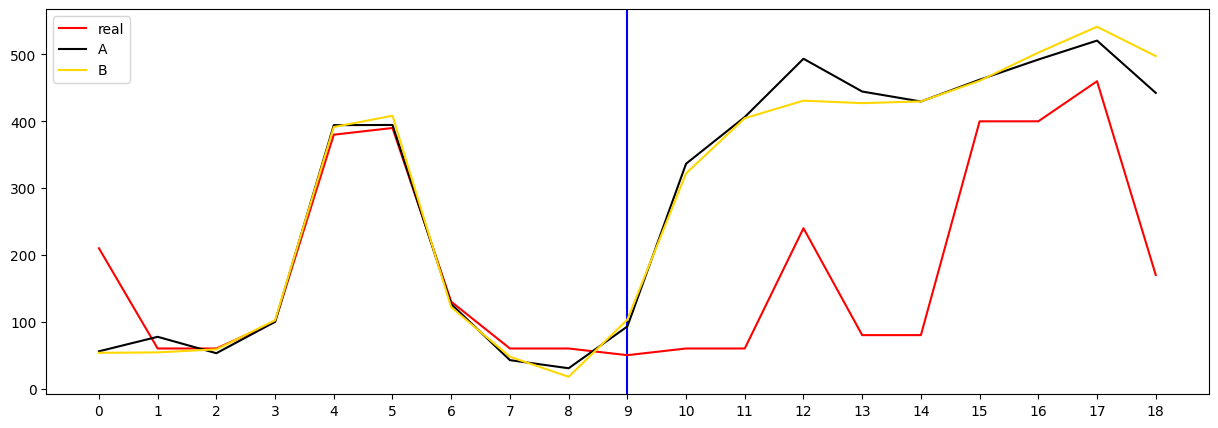

Which prediction is better? (A/B/skip): b
Saved preference.


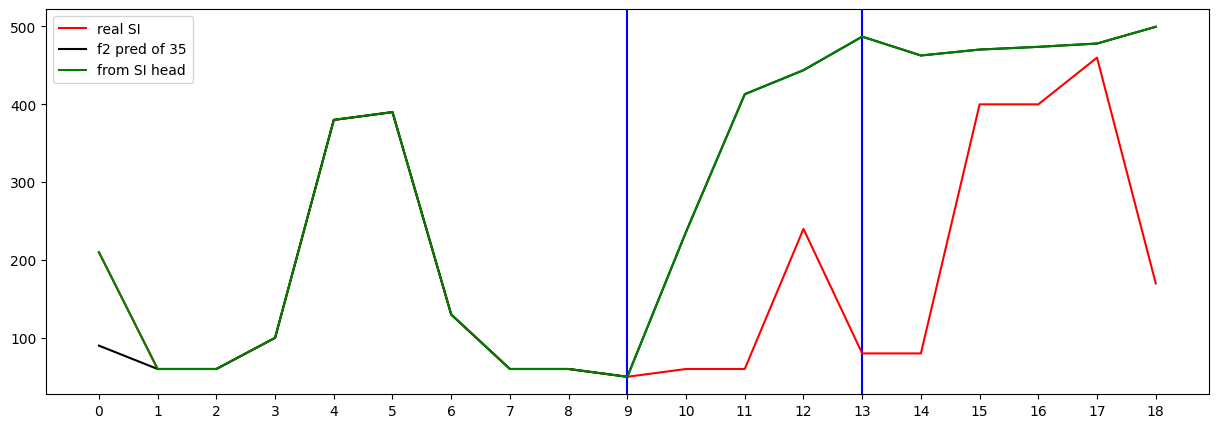

Testing R**2 - (all) - (no inputs):  0.8909329697302953
Testing R**2 - (f2) - SI full (no inputs):  -1.899926511556596
Testing R**2 - SI head only (no inputs):  -1.899926511556596
0 ...index R**2 (no inputs):  -5.347693695125107
1 ...index R**2 (no inputs):  -33.664375616850435
2 ...index R**2 (no inputs):  -1.899926511556596
3 ...index R**2 (no inputs):  -3.569828068414587
4 ...index R**2 (no inputs):  -24.56381525376549
5 ...index R**2 (no inputs):  -200.36556351209524
6 ...index R**2 (no inputs):  -319.56636481527244
7 ...index R**2 (no inputs):  -17.517500782245516
8 ...index R**2 (no inputs):  -48288.43642329492
9 ...index R**2 (no inputs):  -310.19616744785003
10 ...index R**2 (no inputs):  -49.449794073283485
11 ...index R**2 (no inputs):  -1112.7527491576786
12 ...index R**2 (no inputs):  -314.43055683409943
13 ...index R**2 (no inputs):  -98.86444362181254
14 ...index R**2 (no inputs):  -3747.672869331575
15 ...index R**2 (no inputs):  -915.3508829451515
16 ...index R**2 (no i

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to500_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )





## R2 over accumulated Runs


In [49]:

inferenceGPT_obj.print_ALL_R2s_THE_END()


====================================400to500
1 .....................R² on first n steps - R²: -7.032169867761301
Naive_R2:....................................R²: -5.7693
RMSE:109.3573,MAE:87.8581,MASE:1.9524
1 .......................R² on just step n - R²: -7.032169867761301
Naive_R2:....................................R²: -5.7693
RMSE:109.3573,MAE:87.8581,MASE:1.9524
2 .....................R² on first n steps - R²: -5.059294981657169
Naive_R2:....................................R²: -1.8309
RMSE:132.3051,MAE:103.6137,MASE:1.7864
2 .......................R² on just step n - R²: -6.203203163146973
Naive_R2:....................................R²: -3.8021
RMSE:151.8231,MAE:119.3694,MASE:1.9895
3 .....................R² on first n steps - R²: -7.069828719581606
Naive_R2:....................................R²: -1.6528
RMSE:138.5217,MAE:106.6191,MASE:1.6725
3 .......................R² on just step n - R²: -77.07679510218227
Naive_R2:....................................R²: -26.0666
RMSE:150.18

In [50]:

print("End")


End
